In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
crashes = pd.read_csv('dataset/crashes_cleaned.csv')

In [3]:
len(crashes)

841633

In [4]:
crashes.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841633 entries, 0 to 841632
Data columns (total 64 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   841633 non-null  object 
 1   CRASH_DATE                        841633 non-null  object 
 2   POSTED_SPEED_LIMIT                841633 non-null  int64  
 3   WEATHER_SEVERITY                  841633 non-null  int64  
 4   LIGHTING_SEVERITY                 841633 non-null  int64  
 5   FIRST_CRASH_TYPE                  841633 non-null  object 
 6   TRAFFICWAY_TYPE                   841633 non-null  object 
 7   ROADWAY_SEVERITY                  841633 non-null  int64  
 8   CRASH_TYPE                        841633 non-null  object 
 9   DAMAGE_SEVERITY                   841633 non-null  int64  
 10  PRIM_CONTRIBUTORY_CAUSE           841633 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE            841633 non-null  o

In [5]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841633 entries, 0 to 841632
Data columns (total 64 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   841633 non-null  object 
 1   CRASH_DATE                        841633 non-null  object 
 2   POSTED_SPEED_LIMIT                841633 non-null  int64  
 3   WEATHER_SEVERITY                  841633 non-null  int64  
 4   LIGHTING_SEVERITY                 841633 non-null  int64  
 5   FIRST_CRASH_TYPE                  841633 non-null  object 
 6   TRAFFICWAY_TYPE                   841633 non-null  object 
 7   ROADWAY_SEVERITY                  841633 non-null  int64  
 8   CRASH_TYPE                        841633 non-null  object 
 9   DAMAGE_SEVERITY                   841633 non-null  int64  
 10  PRIM_CONTRIBUTORY_CAUSE           841633 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE            841633 non-null  o

In [6]:
crashes.columns.sort_values()

Index(['AGE', 'BEAT_OF_OCCURRENCE', 'CATEGORY_Motorcycle',
       'CATEGORY_Off-Road/Specialized', 'CATEGORY_Passenger Vehicle',
       'CATEGORY_Public Transport', 'CATEGORY_Truck/Commercial', 'CRASH_DATE',
       'CRASH_DAY', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'CRASH_MONTH',
       'CRASH_RECORD_ID', 'CRASH_TYPE', 'CRASH_TYPE_b', 'CRASH_YEAR',
       'DAMAGE_CATEGORY_HIGH', 'DAMAGE_CATEGORY_LOW', 'DAMAGE_CATEGORY_MEDIUM',
       'DAMAGE_SEVERITY', 'FIRST_CRASH_TYPE', 'GENDER_FEMALE', 'GENDER_MALE',
       'GENDER_UNKNOWN', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_TOTAL', 'LATITUDE', 'LIGHTING_CATEGORY_DAYLIGHT',
       'LIGHTING_CATEGORY_NIGHT', 'LIGHTING_CATEGORY_UNKNOWN',
       'LIGHTING_SEVERITY', 'LONGITUDE', 'MOST_SEVERE_INJURY', 'NUM_UNITS',
       'POSTED_SPEED_LIMIT', 'PRIM_CONTRIBUTORY_CAUSE', 'ROADWAY_SEVERITY',
       'ROADWAY_SURFACE_CATEGORY_DRY', 'ROADWAY_SURFACE_CATEGORY_ICE',


# DA METTERE IN UNDERSTANDING/DISTRIBUTION

In [7]:
crashes["DAMAGE_COST"] = crashes["DAMAGE_SEVERITY"].map({0: 500, 1: 1000, 2: 1500})
crashes["DAMAGE_COST"].value_counts()

DAMAGE_COST
1500    537246
1000    211258
500      93129
Name: count, dtype: int64

In [8]:
#category vehicle type number of fatalities
crashes.groupby(['CATEGORY_Off-Road/Specialized', 'INJURIES_FATAL']).size()


CATEGORY_Off-Road/Specialized  INJURIES_FATAL
0.0                            0.0               745583
                               1.0                  824
                               2.0                   61
                               3.0                    8
                               4.0                    1
1.0                            0.0                  247
2.0                            0.0                    3
dtype: int64

In [9]:

#category vehicle type number of fatalities
crashes.groupby(['CATEGORY_Passenger Vehicle', 'INJURIES_FATAL']).size()

CATEGORY_Passenger Vehicle  INJURIES_FATAL
0.0                         0.0                29184
                            1.0                   62
                            2.0                    2
1.0                         0.0               262968
                            1.0                  559
                            2.0                   28
                            3.0                    5
                            4.0                    1
2.0                         0.0               430544
                            1.0                  159
                            2.0                   23
                            3.0                    2
3.0                         0.0                19825
                            1.0                   25
                            2.0                    4
4.0                         0.0                 2846
                            1.0                   16
                            2.0                    1
   

Probably are different type of cars but as long as it is > 0 then it is that category

In [10]:
crashes['Fatality_Vehicle_passenger'] = 0
crashes.loc[(crashes['CATEGORY_Passenger Vehicle'] > 0), 'Fatality_Vehicle_passenger'] = crashes['INJURIES_FATAL']

In [11]:
crashes['Fatality_Vehicle_passenger'].value_counts()

Fatality_Vehicle_passenger
0    840803
1       762
2        59
3         8
4         1
Name: count, dtype: int64

In [12]:
crashes['Fatality_Off-Road/Specialized'] = 0
crashes.loc[(crashes['CATEGORY_Off-Road/Specialized'] > 0), 'Fatality_Off-Road/Specialized'] = crashes['INJURIES_FATAL']
crashes['Fatality_Off-Road/Specialized'].value_counts()

Fatality_Off-Road/Specialized
0    841633
Name: count, dtype: int64

In [13]:
crashes['Fatality_Motorcycle'] = 0
crashes.loc[(crashes['CATEGORY_Motorcycle'] > 0), 'Fatality_Motorcycle'] = crashes['INJURIES_FATAL']
crashes['Fatality_Motorcycle'].value_counts()

Fatality_Motorcycle
0    841561
1        70
2         2
Name: count, dtype: int64

In [14]:
#do the same for CATEGORY_Public Transport
crashes['Fatality_Public Transport'] = 0
crashes.loc[(crashes['CATEGORY_Public Transport'] > 0), 'Fatality_Public Transport'] = crashes['INJURIES_FATAL']
crashes['Fatality_Public Transport'].value_counts()


Fatality_Public Transport
0    841610
1        22
4         1
Name: count, dtype: int64

In [15]:
# CATEGORY_Truck/Commercial
crashes['Fatality_Truck/Commercial'] = 0
crashes.loc[(crashes['CATEGORY_Truck/Commercial'] > 0), 'Fatality_Truck/Commercial'] = crashes['INJURIES_FATAL']
crashes['Fatality_Truck/Commercial'].value_counts()

Fatality_Truck/Commercial
0    841582
1        47
2         4
Name: count, dtype: int64

In [16]:
crashes['INJURIES_FATAL'].value_counts()
#sum Fatality columns
tot = crashes['Fatality_Vehicle_passenger'] + crashes['Fatality_Off-Road/Specialized'] + crashes['Fatality_Motorcycle'] + crashes['Fatality_Public Transport'] + crashes['Fatality_Truck/Commercial']
tot.value_counts()


0    840739
1       749
2       130
3        10
4         4
8         1
Name: count, dtype: int64

In [17]:
crashes['INJURIES_FATAL'].value_counts()

INJURIES_FATAL
0.0    840673
1.0       886
2.0        65
3.0         8
4.0         1
Name: count, dtype: int64

---

In [18]:
import pandas as pd

# Ensure proper data types
crashes["CRASH_YEAR"] = crashes["CRASH_YEAR"].astype(int)
crashes["CRASH_MONTH"] = crashes["CRASH_MONTH"].astype(int)
crashes["BEAT_OF_OCCURRENCE"] = crashes["BEAT_OF_OCCURRENCE"].astype(float)
crashes["AGE"] = pd.to_numeric(crashes["AGE"], errors="coerce")

# Identify all categorical columns dynamically (all starting with 'CATEGORY_', 'LIGHTING_CATEGORY_', 'ROADWAY_SURFACE_CATEGORY_', etc.)
categorical_columns = [col for col in crashes.columns if col.startswith(
    ("CATEGORY_", "LIGHTING_CATEGORY_", "ROADWAY_SURFACE_CATEGORY_", "ROAD_DEFECT_CATEGORY_", "DAMAGE_CATEGORY_"))]
crashes[categorical_columns] = crashes[categorical_columns].apply(pd.to_numeric, errors="coerce")

# Feature Engineering: Creating new indicators
crashes["fatality_rate"] = crashes["INJURIES_FATAL"] / (crashes["INJURIES_TOTAL"] + 1)
crashes["severe_injury_rate"] = crashes["INJURIES_INCAPACITATING"] / (crashes["INJURIES_TOTAL"] + 1)
crashes["injury_severity_score"] = (
    (1 * crashes["INJURIES_NON_INCAPACITATING"]) +
    (5 * crashes["INJURIES_INCAPACITATING"]) +
    (10 * crashes["INJURIES_FATAL"])
)
crashes["vehicle_involvement_rate"] = crashes["NUM_UNITS"] / crashes.groupby(["CRASH_YEAR", "CRASH_MONTH", "BEAT_OF_OCCURRENCE"]).transform("count")["CRASH_RECORD_ID"]
crashes["night_crash_rate"] = crashes["LIGHTING_CATEGORY_NIGHT"].astype(int)
crashes["adverse_weather_crash_rate"] = crashes[["WEATHER_CATEGORY_RAIN", "WEATHER_CATEGORY_EXTREME"]].sum(axis=1)
crashes["road_defect_crash_rate"] = crashes[["ROAD_DEFECT_CATEGORY_BAD", "ROAD_DEFECT_CATEGORY_DEFECT", "ROAD_DEFECT_CATEGORY_DEBRIS"]].sum(axis=1)
crashes["speeding_influence"] = (crashes["POSTED_SPEED_LIMIT"] > 30).astype(int)
crashes["weekend_crash_rate"] = (crashes["CRASH_DAY_OF_WEEK"].isin([6, 7])).astype(int)

# Define neo-patented and senior drivers
crashes["neo_patented_drivers"] = (crashes["AGE"] <= 21).astype(int)
crashes["senior_drivers"] = (crashes["AGE"] >= 65).astype(int)

# Exclude -1 values from mean calculations
def exclude_negatives(series):
    return series.loc[series != -1].mean()

# Grouping by year, month, and police department
incident_profile = crashes.groupby(["CRASH_YEAR", "CRASH_MONTH", "BEAT_OF_OCCURRENCE"]).agg(
    avg_age=("AGE", "mean"),
    avg_responsibility_score=("responsibility_score", exclude_negatives),
    avg_weather_severity=("WEATHER_SEVERITY", exclude_negatives),
    avg_roadway_severity=("ROADWAY_SEVERITY", exclude_negatives),
    avg_lighting_severity=("LIGHTING_SEVERITY", exclude_negatives),
    total_crashes=("CRASH_RECORD_ID", "count"),
    fatality_rate=("fatality_rate", "mean"),
    severe_injury_rate=("severe_injury_rate", "mean"),
    avg_crash_severity_score=("crash_severity_score", "mean"),
    injury_severity_score=("injury_severity_score", "sum"),
    vehicle_involvement_rate=("vehicle_involvement_rate", "mean"),
    night_crash_rate=("night_crash_rate", "mean"),
    adverse_weather_crash_rate=("adverse_weather_crash_rate", "mean"),
    road_defect_crash_rate=("road_defect_crash_rate", "mean"),
    speeding_influence=("speeding_influence", "mean"),
    weekend_crash_rate=("weekend_crash_rate", "mean"),
    neo_patented_drivers=("neo_patented_drivers", "sum"),
    senior_drivers=("senior_drivers", "sum"),
    num_towed_units_LB=("TOW", "sum"),
    damage_low=("DAMAGE_CATEGORY_LOW", "sum"),
    damage_medium=("DAMAGE_CATEGORY_MEDIUM", "sum"),
    damage_high=("DAMAGE_CATEGORY_HIGH", "sum"),
    damage_cost_LB=("DAMAGE_COST", "sum"),
    **{f"sum_{col.lower()}": (col, "sum") for col in categorical_columns}
).reset_index()

# Save the result to a CSV file
incident_profile.to_csv("dataset/incident_profile.csv", index=False)

# Display the first few rows
incident_profile.head()


,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_age,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,vehicle_involvement_rate,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial
0,2017,1,111.0,48.525000,0.621429,0.578947,0.263158,0.550000,20,0.0,0.000000,0.021354,0.0,0.100000,0.500000,0.200000,0.000000,0.050000,0.150000,0,4,0,3,6,11,24000,10,10,0,14,6,0,0,0,19,0,0,0,1,11,3,6,0.0,0.0,28.0,1.0,3.0
1,2017,1,112.0,44.823529,0.633333,0.705882,0.437500,0.647059,18,0.0,0.000000,0.020658,0.0,0.111111,0.388889,0.277778,0.000000,0.000000,0.000000,0,1,0,5,6,7,19000,10,7,1,13,4,0,1,0,16,0,0,0,2,7,5,6,0.0,0.0,30.0,0.0,2.0
2,2017,1,113.0,44.388889,0.654545,0.368421,0.176471,0.315789,20,0.0,0.000000,0.027012,0.0,0.105000,0.250000,0.150000,0.000000,0.050000,0.050000,0,1,0,4,3,13,24500,14,5,1,15,4,0,0,1,17,0,0,0,3,13,4,3,0.0,0.0,37.0,1.0,0.0
3,2017,1,114.0,42.208333,0.586111,0.367347,0.413043,0.566038,53,0.0,0.012579,0.066048,10.0,0.037736,0.452830,0.150943,0.037736,0.207547,0.094340,0,3,4,15,15,23,57000,29,24,0,38,10,1,1,3,44,2,0,0,7,23,15,15,0.0,0.0,80.0,2.0,4.0
4,2017,1,121.0,39.703125,0.577778,0.485714,0.400000,0.555556,36,0.0,0.000000,0.026729,0.0,0.055556,0.416667,0.222222,0.027778,0.083333,0.055556,2,1,0,5,7,24,45500,21,15,0,23,12,0,0,1,29,0,0,1,6,24,5,7,0.0,0.0,57.0,2.0,3.0


In [19]:
incident_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26185 entries, 0 to 26184
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            26185 non-null  int64  
 1   CRASH_MONTH                           26185 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    26185 non-null  float64
 3   avg_age                               26180 non-null  float64
 4   avg_responsibility_score              26129 non-null  float64
 5   avg_weather_severity                  26185 non-null  float64
 6   avg_roadway_severity                  26179 non-null  float64
 7   avg_lighting_severity                 26185 non-null  float64
 8   total_crashes                         26185 non-null  int64  
 9   fatality_rate                         26185 non-null  float64
 10  severe_injury_rate                    26185 non-null  float64
 11  avg_crash_sever

In [20]:
# percentage of missing values
incident_profile.isnull().mean() * 100



CRASH_YEAR                              0.000000
CRASH_MONTH                             0.000000
BEAT_OF_OCCURRENCE                      0.000000
avg_age                                 0.019095
avg_responsibility_score                0.213863
avg_weather_severity                    0.000000
avg_roadway_severity                    0.022914
avg_lighting_severity                   0.000000
total_crashes                           0.000000
fatality_rate                           0.000000
severe_injury_rate                      0.000000
avg_crash_severity_score                0.000000
injury_severity_score                   0.000000
vehicle_involvement_rate                0.000000
night_crash_rate                        0.000000
adverse_weather_crash_rate              0.000000
road_defect_crash_rate                  0.000000
speeding_influence                      0.000000
weekend_crash_rate                      0.000000
neo_patented_drivers                    0.000000
senior_drivers      

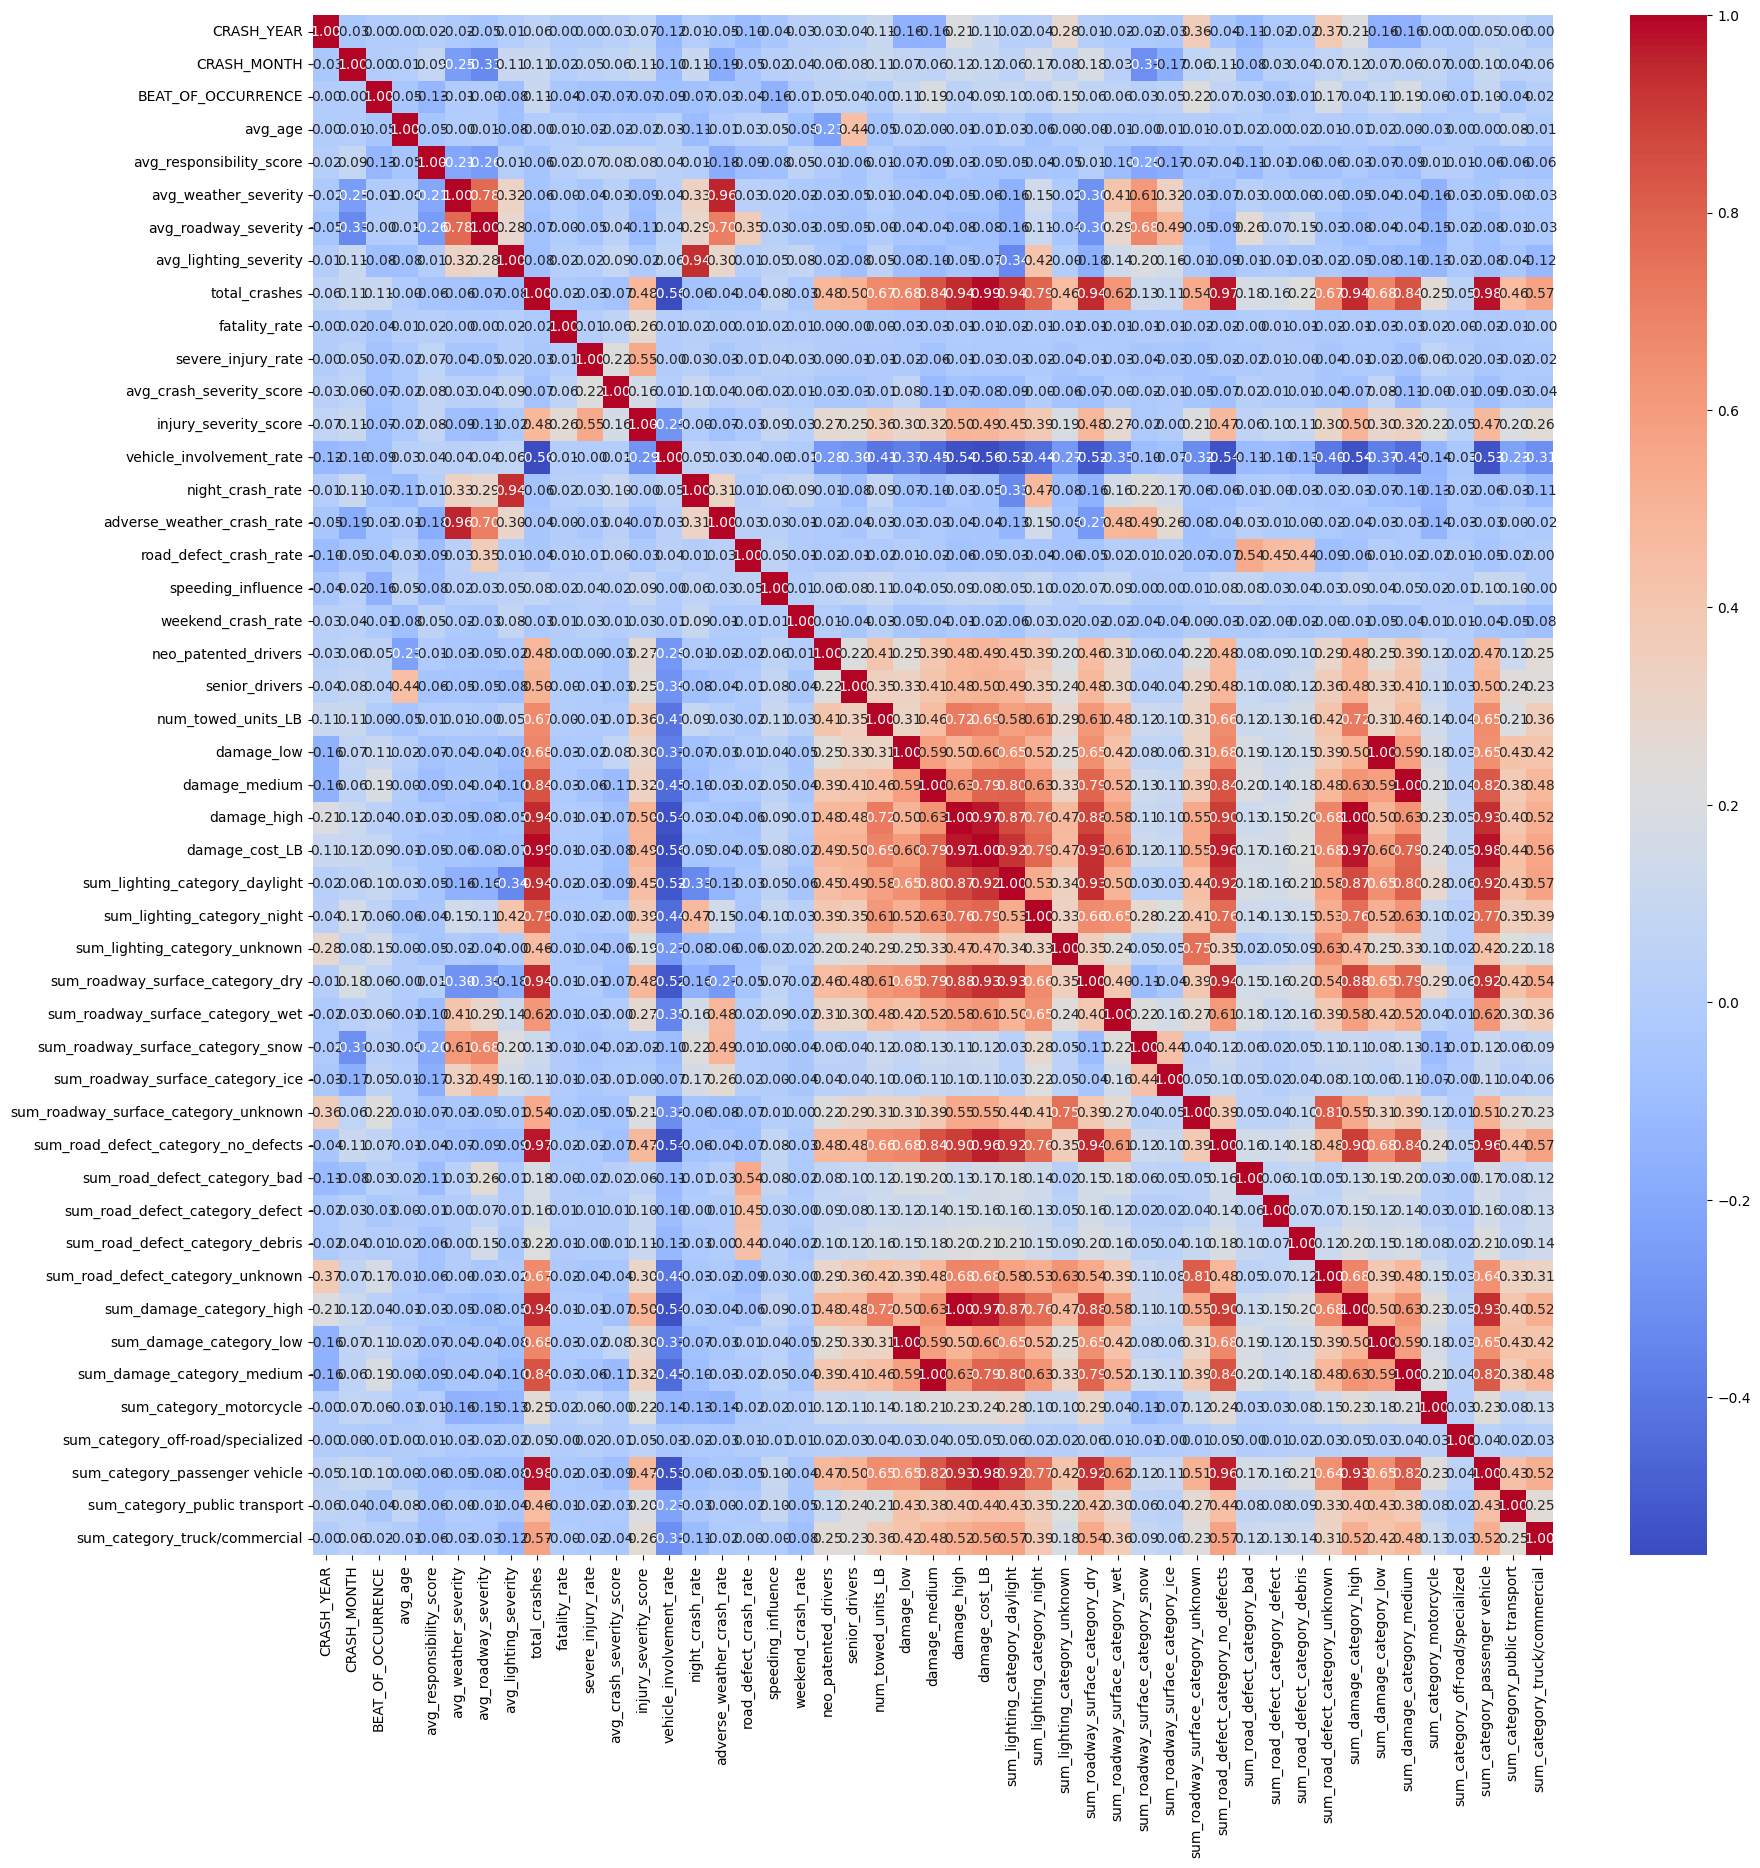

In [21]:
# plot correlation matric for incident_profile
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(incident_profile.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()




---

# first quick correlation analisys

In [22]:
# columns to analize

columns = ['avg_age', 'avg_responsibility_score', 'avg_weather_severity',
           'avg_roadway_severity', 'avg_lighting_severity', 'total_crashes', 'fatality_rate',
           'severe_injury_rate', 'avg_crash_severity_score', 'injury_severity_score', 'vehicle_involvement_rate',
           'night_crash_rate', 'adverse_weather_crash_rate', 'road_defect_crash_rate', 'speeding_influence',
           'weekend_crash_rate', 'neo_patented_drivers', 'senior_drivers', 'num_towed_units_LB', 'damage_low','damage_medium', 
           'damage_high', 'damage_cost_LB']

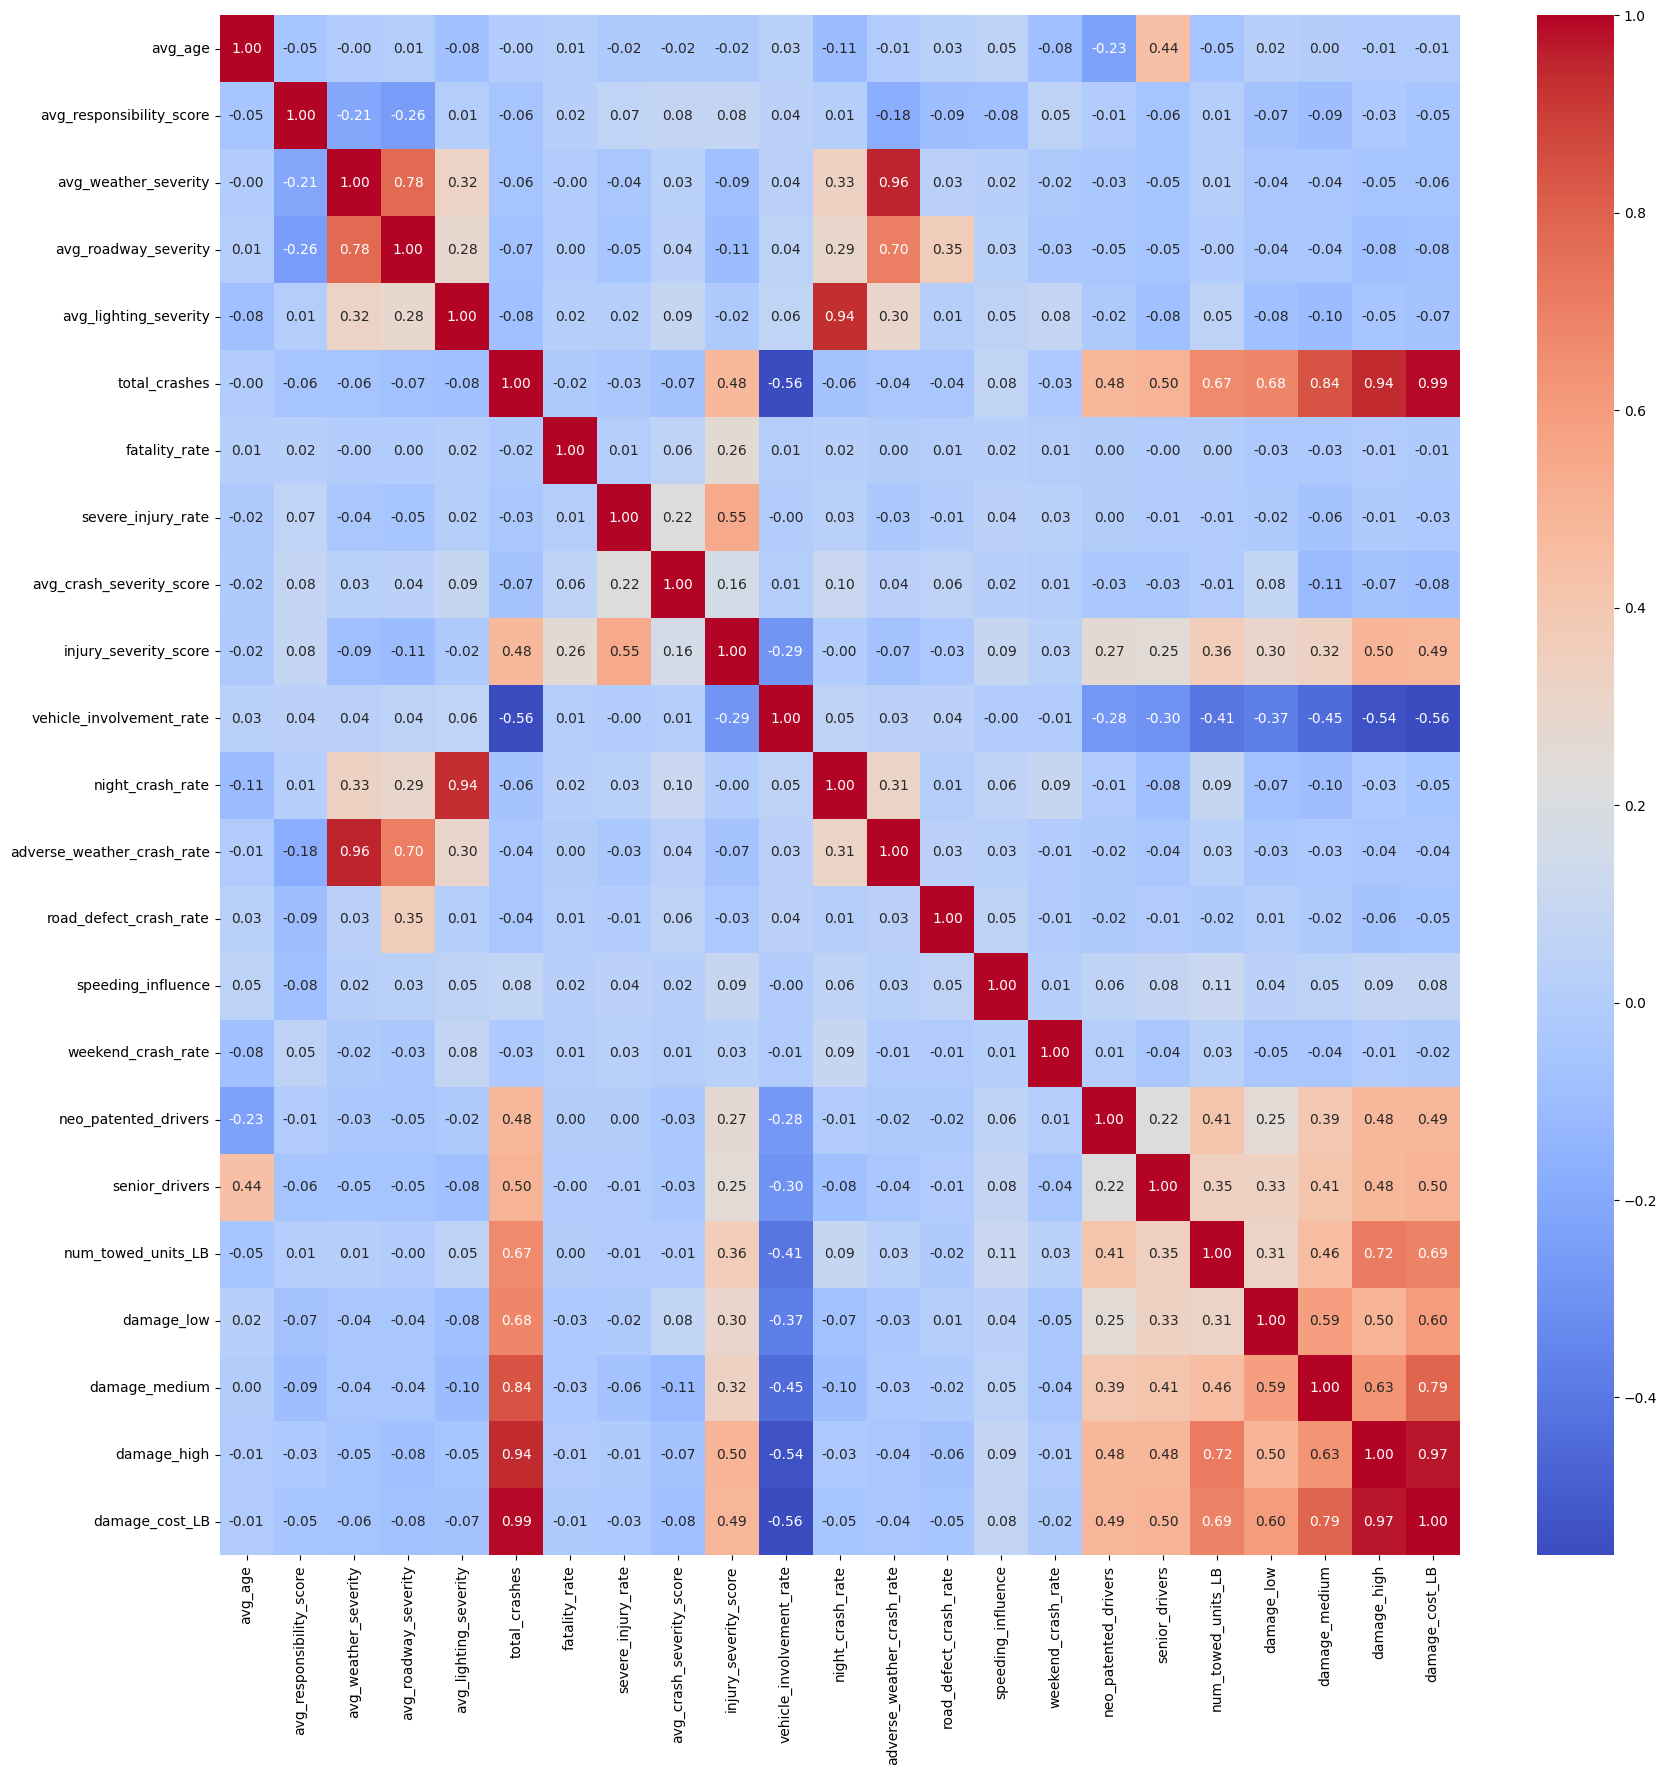

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(incident_profile[columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

---

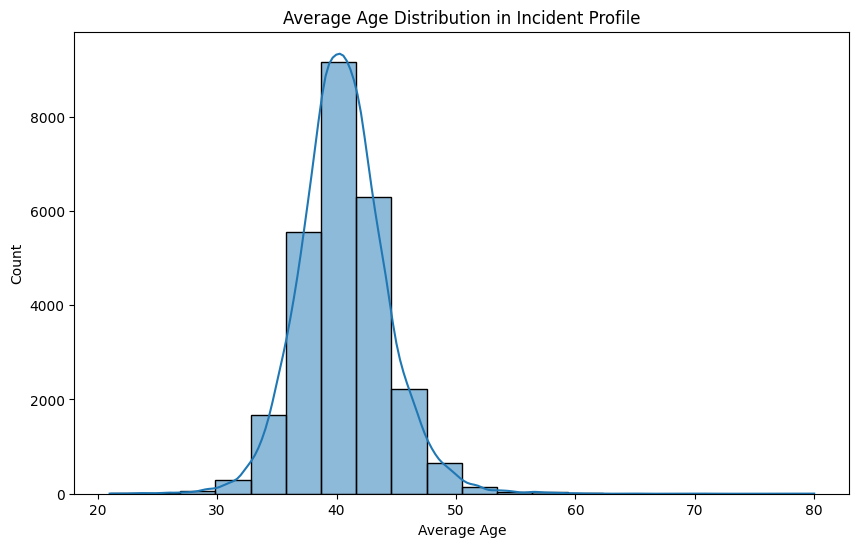

In [24]:
# age distribution for incident profile
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_age"], bins=20, kde=True)
plt.title("Average Age Distribution in Incident Profile")
plt.xlabel("Average Age")
plt.ylabel("Count")
plt.show()


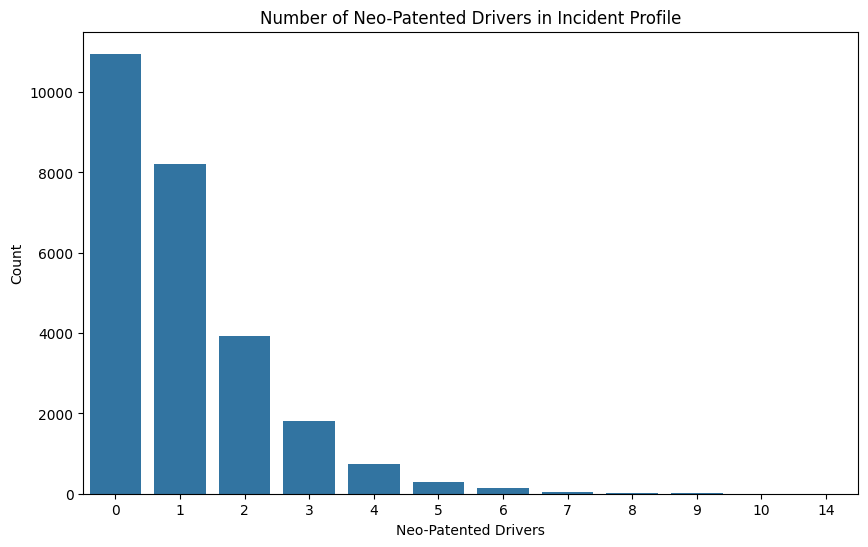

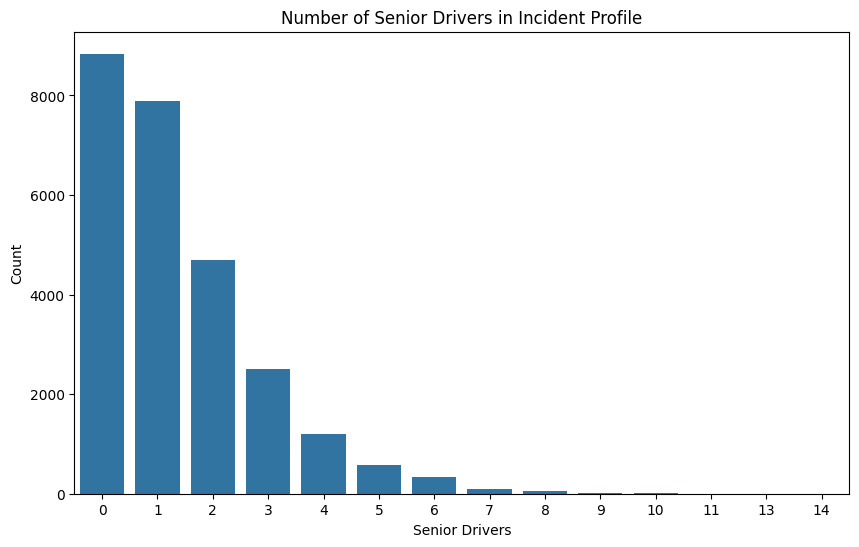

In [25]:
# number of neo-patented drivers and senior drivers
plt.figure(figsize=(10, 6))
sns.countplot(data=incident_profile, x="neo_patented_drivers")
plt.title("Number of Neo-Patented Drivers in Incident Profile")
plt.xlabel("Neo-Patented Drivers")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=incident_profile, x="senior_drivers")
plt.title("Number of Senior Drivers in Incident Profile")
plt.xlabel("Senior Drivers")
plt.ylabel("Count")
plt.show()


Text(0, 0.5, 'Count')

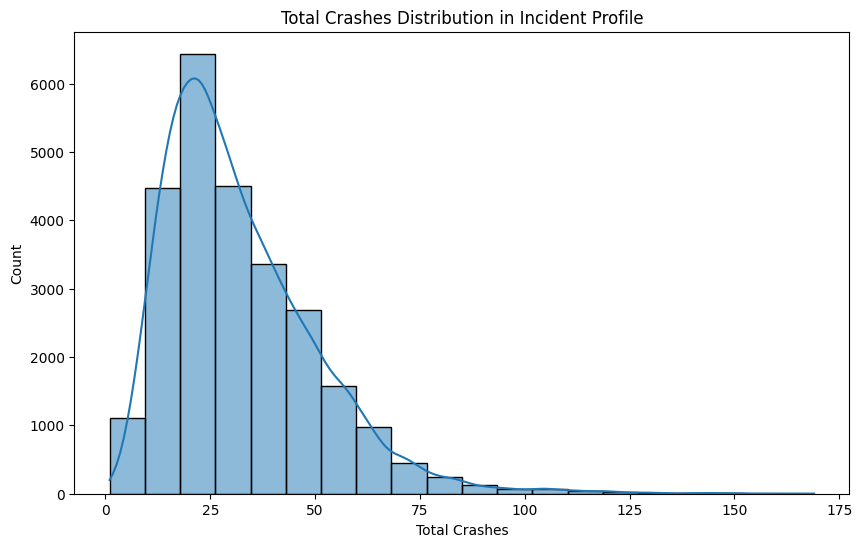

In [26]:
# total crashes distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["total_crashes"], bins=20, kde=True)
plt.title("Total Crashes Distribution in Incident Profile")
plt.xlabel("Total Crashes")
plt.ylabel("Count")

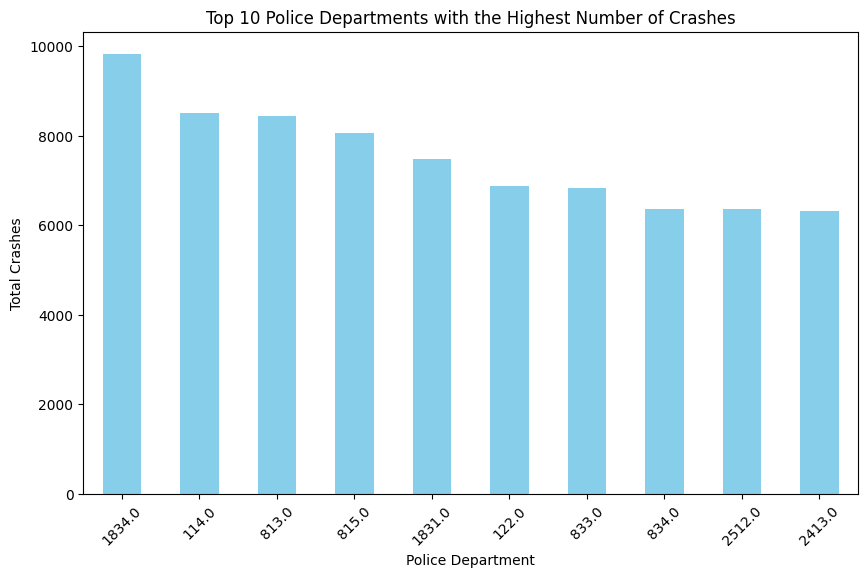

In [27]:
# top 10 police departments with the highest number of crashes
top_police_departments = incident_profile.groupby("BEAT_OF_OCCURRENCE")["total_crashes"].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_police_departments.plot(kind="bar", color="skyblue")
plt.title("Top 10 Police Departments with the Highest Number of Crashes")
plt.xlabel("Police Department")
plt.ylabel("Total Crashes")
plt.xticks(rotation=45)
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\1614737875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="BEAT_OF_OCCURRENCE", y="avg_age", palette="coolwarm")


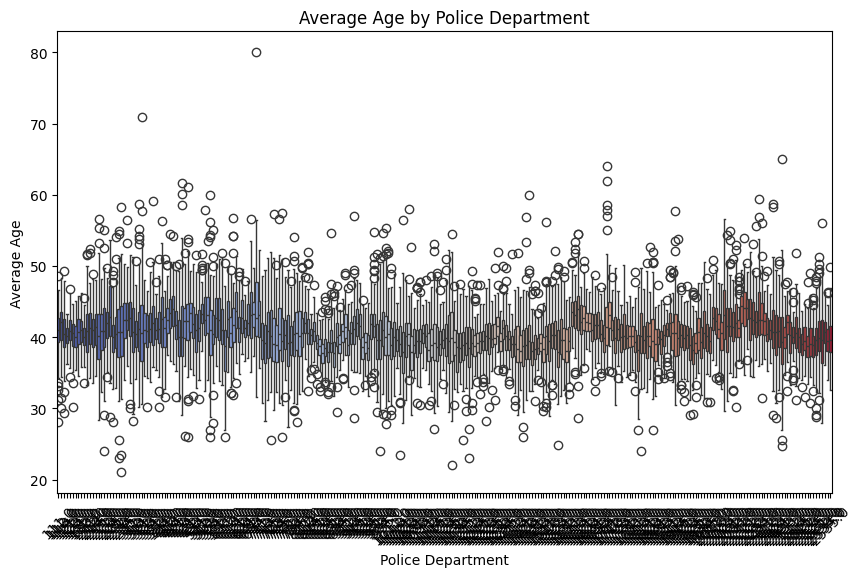

In [28]:
# boxplot for average age by police department
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="BEAT_OF_OCCURRENCE", y="avg_age", palette="coolwarm")
plt.title("Average Age by Police Department")
plt.xlabel("Police Department")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.show()


In [29]:
# isolation tree for anomaly detection
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Selecting features for anomaly detection
features = [
    "avg_age"
]

# Splitting the data into training and testing sets
X_train, X_test = train_test_split(incident_profile[features], test_size=0.2, random_state=42)

# Training the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_train)

# Predicting anomalies
anomalies = isolation_forest.predict(X_test)
anomalies = pd.Series(anomalies).replace({1: 0, -1: 1})

# Displaying the number of anomalies
anomalies.value_counts()


0    5191
1      46
Name: count, dtype: int64

In [30]:
# Displaying the anomalies
anomalies_df = X_test.copy()
anomalies_df["anomaly"] = anomalies
anomalies_df[anomalies_df["anomaly"] == 1]


,avg_age,anomaly
3739,41.833333,1.0
520,50.333333,1.0
482,40.416667,1.0
2583,37.682540,1.0
2004,39.777778,1.0
121,35.685185,1.0
2698,41.775794,1.0
1349,44.306452,1.0


---

## Main distribution, dataset initial analisys

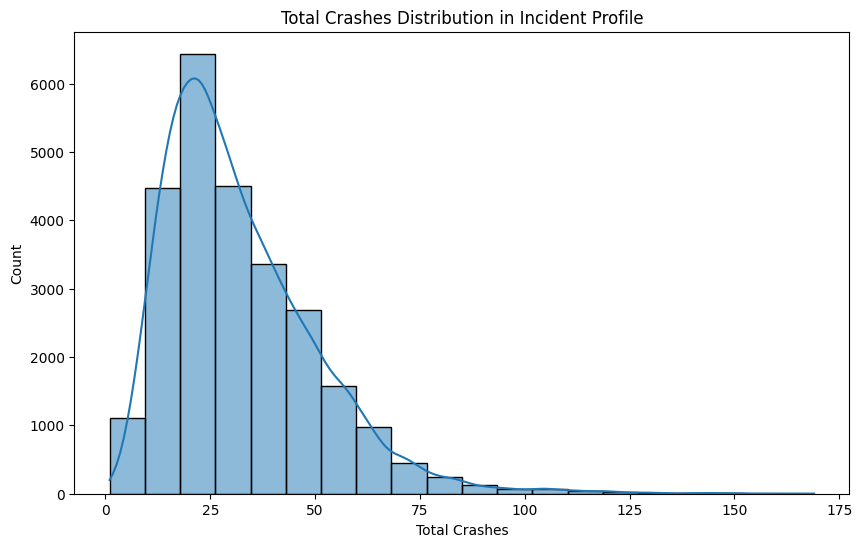

In [31]:
# total_crashes
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["total_crashes"], bins=20, kde=True)
plt.title("Total Crashes Distribution in Incident Profile")
plt.xlabel("Total Crashes")
plt.ylabel("Count")
plt.show()

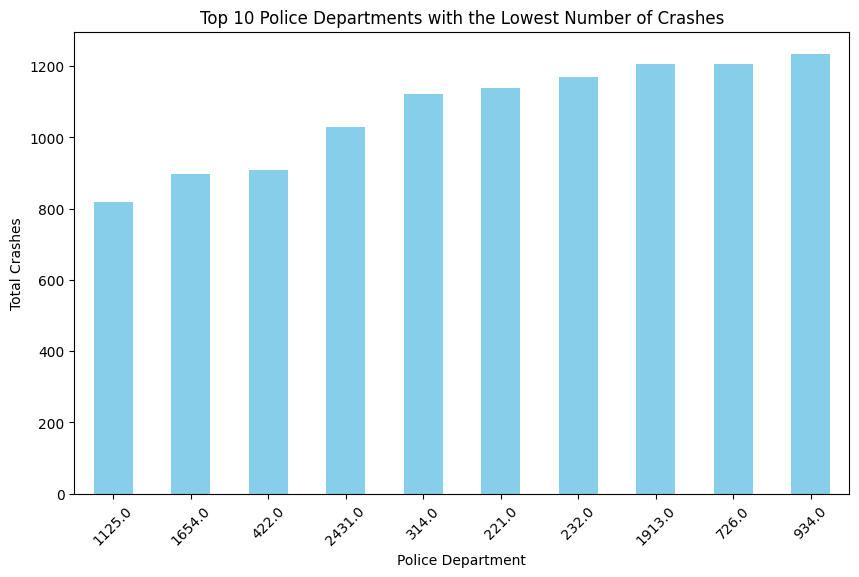

In [32]:
# top 10 police departments with the lowest number of crashes
bottom_police_departments = incident_profile.groupby("BEAT_OF_OCCURRENCE")["total_crashes"].sum().nsmallest(10)
plt.figure(figsize=(10, 6))

bottom_police_departments.plot(kind="bar", color="skyblue")
plt.title("Top 10 Police Departments with the Lowest Number of Crashes")
plt.xlabel("Police Department")
plt.ylabel("Total Crashes")
plt.xticks(rotation=45)
plt.show()

In [33]:
# police department with less than 10 crashes in a month
low_crash_police_departments = incident_profile[incident_profile["total_crashes"] < 2]
len(low_crash_police_departments)

18

In [34]:
low_crash_police_departments.head(20)

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_age,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,vehicle_involvement_rate,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial
113,2017,1,933.0,41.0,NaN,3.0,0.0,0.0,1,0.0,0.0,0.013789,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,1,1500,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0
191,2017,1,1654.0,46.0,0.6,0.0,0.0,0.0,1,0.0,0.0,0.023266,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1500,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0
286,2017,2,221.0,34.0,NaN,0.0,0.0,1.0,1,0.0,0.0,0.047259,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1500,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0
292,2017,2,232.0,23.5,0.6,1.0,0.0,2.0,1,0.0,0.0,0.013789,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1500,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0
339,2017,2,633.0,80.0,NaN,0.0,NaN,1.0,1,0.0,0.0,0.023266,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1500,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0.0,1.0,0.0,0.0
662,2017,3,1024.0,NaN,NaN,0.0,0.0,0.0,1,0.0,0.0,0.018063,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
830,2017,4,232.0,21.0,NaN,0.0,NaN,2.0,1,0.0,0.0,0.023266,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1000,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.0,0.0,2.0,0.0,0.0
921,2017,4,933.0,NaN,NaN,0.0,NaN,2.0,1,0.0,0.0,0.018063,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1500,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.0,0.0,0.0,0.0,0.0
1268,2017,5,1654.0,48.0,0.6,0.0,0.0,2.0,1,0.0,0.0,0.023266,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,1500,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0
1538,2017,6,1654.0,38.0,0.6,0.0,0.0,0.0,1,0.0,0.0,0.023266,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1500,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,2.0,0.0,0.0


In [35]:
incident_profile["total_crashes"].quantile(0.05)

np.float64(10.0)

In [36]:
# get the 5% of police departments with the lowest number of crashes using the incident profile
low_crash_police_departments = incident_profile[incident_profile["total_crashes"] < incident_profile["total_crashes"].quantile(0.05)]
len(low_crash_police_departments)


1107

In [37]:
incident_profile_test = incident_profile[incident_profile["total_crashes"] >= incident_profile["total_crashes"].quantile(0.05)]

In [38]:
incident_profile_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25078 entries, 0 to 26184
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            25078 non-null  int64  
 1   CRASH_MONTH                           25078 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    25078 non-null  float64
 3   avg_age                               25078 non-null  float64
 4   avg_responsibility_score              25075 non-null  float64
 5   avg_weather_severity                  25078 non-null  float64
 6   avg_roadway_severity                  25078 non-null  float64
 7   avg_lighting_severity                 25078 non-null  float64
 8   total_crashes                         25078 non-null  int64  
 9   fatality_rate                         25078 non-null  float64
 10  severe_injury_rate                    25078 non-null  float64
 11  avg_crash_severity_s

no missing values this way...

In [39]:
low_crash_police_departments['BEAT_OF_OCCURRENCE'].value_counts()

BEAT_OF_OCCURRENCE
1125.0    64
422.0     51
2431.0    41
1654.0    40
314.0     29
          ..
1921.0     1
2012.0     1
1922.0     1
334.0      1
735.0      1
Name: count, Length: 159, dtype: int64

In [40]:
# subset of incident profile with the departments in the low_crash_police_departments 
incident_profile_low_crash = incident_profile[incident_profile['BEAT_OF_OCCURRENCE'].isin(low_crash_police_departments['BEAT_OF_OCCURRENCE'])]

incident_profile_low_crash['BEAT_OF_OCCURRENCE'].value_counts()


BEAT_OF_OCCURRENCE
111.0     97
112.0     97
113.0     97
121.0     97
132.0     97
          ..
2524.0    97
2532.0    97
2531.0    97
2535.0    97
1654.0    92
Name: count, Length: 159, dtype: int64

Incident Profile Crash Counts (Total):
BEAT_OF_OCCURRENCE
111.0    97
112.0    97
113.0    97
114.0    97
121.0    97
dtype: int64

5th percentile threshold (total crashes): 97.0

Departments in the bottom 5% (by total crashes): [111.0, 112.0, 113.0, 114.0, 121.0, 122.0, 123.0, 124.0, 131.0, 132.0, 133.0, 211.0, 212.0, 213.0, 214.0, 215.0, 221.0, 222.0, 223.0, 224.0, 225.0, 231.0, 232.0, 233.0, 234.0, 235.0, 311.0, 312.0, 313.0, 314.0, 321.0, 322.0, 323.0, 324.0, 331.0, 332.0, 333.0, 334.0, 411.0, 412.0, 413.0, 414.0, 421.0, 422.0, 423.0, 424.0, 431.0, 432.0, 433.0, 434.0, 511.0, 512.0, 513.0, 522.0, 523.0, 524.0, 531.0, 532.0, 533.0, 611.0, 612.0, 613.0, 614.0, 621.0, 622.0, 623.0, 624.0, 631.0, 632.0, 633.0, 634.0, 711.0, 712.0, 713.0, 714.0, 715.0, 722.0, 723.0, 724.0, 725.0, 726.0, 731.0, 732.0, 733.0, 734.0, 735.0, 811.0, 812.0, 813.0, 814.0, 815.0, 821.0, 822.0, 823.0, 824.0, 825.0, 831.0, 832.0, 833.0, 834.0, 835.0, 911.0, 912.0, 913.0, 914.0, 915.0, 921.0, 922.0, 923.0, 924.0, 

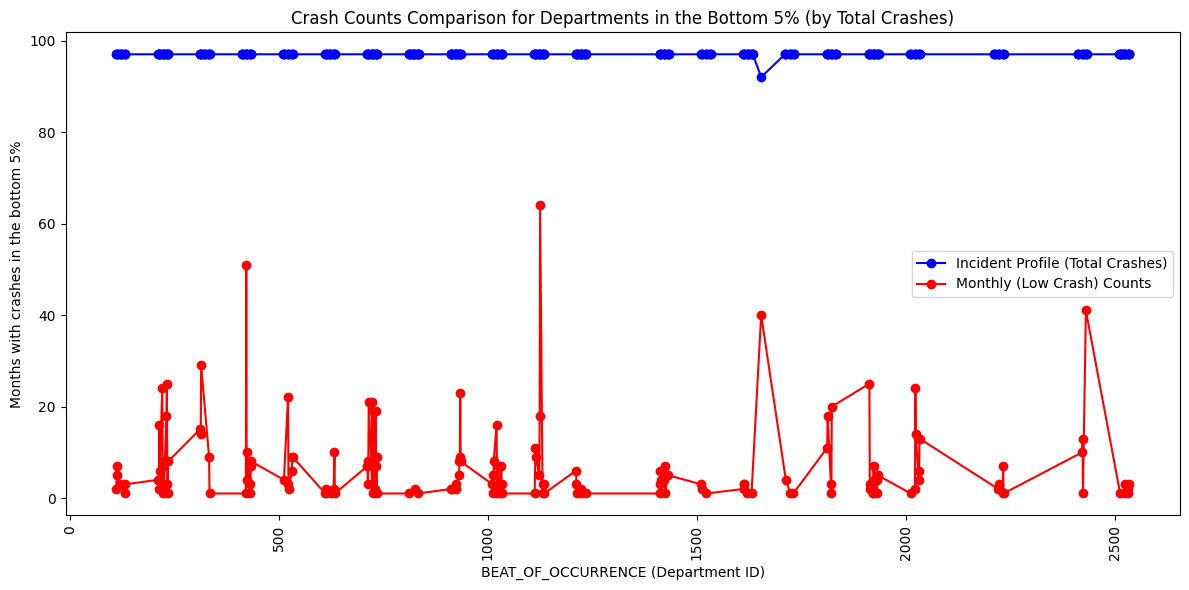

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Compute total crashes per department from incident_profile ---
# Each row is assumed to be one crash.
incident_counts = incident_profile.groupby('BEAT_OF_OCCURRENCE').size()
incident_counts = incident_counts.sort_index()  # sort by department ID for plotting
print("Incident Profile Crash Counts (Total):")
print(incident_counts.head())

# --- 2. Compute the 5th percentile threshold based on total number of crashes ---
threshold = incident_counts.quantile(0.05)
print("\n5th percentile threshold (total crashes):", threshold)

# --- 3. Identify departments in the bottom 5% (by total number of crashes) ---
bottom_depts = incident_counts[incident_counts <= threshold].index
print("\nDepartments in the bottom 5% (by total crashes):", list(bottom_depts))

# --- 4. Get monthly counts from low_crash_police_departments for all departments ---
# (Here, each row in low_crash_police_departments represents one crash.)
monthly_counts = low_crash_police_departments['BEAT_OF_OCCURRENCE'].value_counts().sort_index()
print("\nMonthly Counts (from low_crash_police_departments):")
print(monthly_counts.head())

# Get the monthly counts for only the bottom departments
monthly_bottom_counts = monthly_counts[monthly_counts.index.isin(bottom_depts)]

# Also, extract the corresponding incident_profile counts for these departments
incident_bottom_counts = incident_counts[incident_counts.index.isin(bottom_depts)]

# --- 5. Plot the two lines ---
plt.figure(figsize=(12, 6))

# Plot the overall counts from incident_profile (usually higher)
plt.plot(incident_bottom_counts.index, incident_bottom_counts.values, 
         marker='o', linestyle='-', color='blue',
         label='Incident Profile (Total Crashes)')

# Plot the monthly counts from low_crash_police_departments
plt.plot(monthly_bottom_counts.index, monthly_bottom_counts.values, 
         marker='o', linestyle='-', color='red',
         label='Monthly (Low Crash) Counts')

plt.xlabel('BEAT_OF_OCCURRENCE (Department ID)')
plt.ylabel('Months with crashes in the bottom 5%')
plt.title('Crash Counts Comparison for Departments in the Bottom 5% (by Total Crashes)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

def flag_outliers_iqr(group, multiplier=1.5):
    # Compute Q1 and Q3 for the crash counts in this department
    q1 = group['total_crashes'].quantile(0.15)
    q3 = group['total_crashes'].quantile(0.85)
    iqr = q3 - q1
    
    # Define lower and upper bounds
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    # Flag as outlier if crash_count is outside the bounds.
    group['is_outlier'] = (group['total_crashes'] < lower_bound) | (group['total_crashes'] > upper_bound)
    
    # Optionally, store the bounds for inspection
    group['lower_bound'] = lower_bound
    group['upper_bound'] = upper_bound
    return group

# Apply this function groupwise (by department)
incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_iqr)

# Now, incident_profile_flagged contains a Boolean column 'is_outlier'
# You can inspect the flagged entries:
outliers_iqr = incident_profile_flagged[incident_profile_flagged['is_outlier']]
print(len(outliers_iqr))
outliers_iqr[['BEAT_OF_OCCURRENCE', 'CRASH_YEAR', 'CRASH_MONTH', 'total_crashes', 'is_outlier', 'lower_bound', 'upper_bound']].head()


10


C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\3966226512.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_iqr)


,,BEAT_OF_OCCURRENCE,CRASH_YEAR,CRASH_MONTH,total_crashes,is_outlier,lower_bound,upper_bound
BEAT_OF_OCCURRENCE,,,,,,,,
713.0,11678,713.0,2020,8,40,True,-1.0,39.0
1031.0,663,1031.0,2017,3,8,True,9.0,81.0
1034.0,397,1034.0,2017,2,8,True,10.1,92.5
1115.0,11467,1115.0,2020,7,39,True,-5.5,38.5
1132.0,12014,1132.0,2020,9,51,True,-1.5,50.5


In [43]:
import pandas as pd
from scipy.stats import zscore

def flag_outliers_zscore(group, threshold=3):
    # Calculate the z-scores for the crash counts in this department.
    # zscore() returns a numpy array of the same length as the group.
    group['zscore'] = zscore(group['total_crashes'])
    
    # Flag as outlier if the absolute z-score exceeds the threshold.
    group['is_outlier'] = group['zscore'].abs() > threshold
    return group

# Apply the function groupwise
incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_zscore)

# Inspect outliers:
outliers_z = incident_profile_flagged[incident_profile_flagged['is_outlier']]
print(len(outliers_z))
outliers_z[outliers_z['zscore'] < 0][['BEAT_OF_OCCURRENCE', 'CRASH_YEAR', 'CRASH_MONTH', 'total_crashes', 'is_outlier', 'zscore']].head()


82


C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\1004325707.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_zscore)


,,BEAT_OF_OCCURRENCE,CRASH_YEAR,CRASH_MONTH,total_crashes,is_outlier,zscore
BEAT_OF_OCCURRENCE,,,,,,,
222.0,287,222.0,2017,2,4,True,-3.039261
431.0,854,431.0,2017,4,7,True,-3.098315
511.0,320,511.0,2017,2,18,True,-3.045609
523.0,324,523.0,2017,2,3,True,-3.246667
633.0,339,633.0,2017,2,1,True,-3.143032


In [44]:
outliers_z['total_crashes'].value_counts().sort_index()

total_crashes
1     1
3     2
4     4
5     2
6     2
7     5
8     2
9     1
11    2
12    1
13    1
18    1
19    2
21    1
22    1
23    1
24    1
25    2
27    1
28    1
29    1
32    2
34    2
35    1
36    2
38    2
39    1
40    3
41    6
42    1
43    1
45    2
46    1
47    1
48    2
49    2
50    1
51    2
52    1
53    1
54    1
55    1
56    1
57    1
59    1
64    1
70    2
71    1
76    1
77    1
82    1
90    1
Name: count, dtype: int64

In [45]:
# print BEAT_OF_OCCURENCE 633.0	YEAR 2017	MONTH 2 from incident_profile
incident_profile[(incident_profile['BEAT_OF_OCCURRENCE'] == 633.0)]

,CRASH_YEAR,CRASH_MONTH,BEAT_OF_OCCURRENCE,avg_age,avg_responsibility_score,avg_weather_severity,avg_roadway_severity,avg_lighting_severity,total_crashes,fatality_rate,severe_injury_rate,avg_crash_severity_score,injury_severity_score,vehicle_involvement_rate,night_crash_rate,adverse_weather_crash_rate,road_defect_crash_rate,speeding_influence,weekend_crash_rate,neo_patented_drivers,senior_drivers,num_towed_units_LB,damage_low,damage_medium,damage_high,damage_cost_LB,sum_lighting_category_daylight,sum_lighting_category_night,sum_lighting_category_unknown,sum_roadway_surface_category_dry,sum_roadway_surface_category_wet,sum_roadway_surface_category_snow,sum_roadway_surface_category_ice,sum_roadway_surface_category_unknown,sum_road_defect_category_no_defects,sum_road_defect_category_bad,sum_road_defect_category_defect,sum_road_defect_category_debris,sum_road_defect_category_unknown,sum_damage_category_high,sum_damage_category_low,sum_damage_category_medium,sum_category_motorcycle,sum_category_off-road/specialized,sum_category_passenger vehicle,sum_category_public transport,sum_category_truck/commercial
69,2017,1,633.0,41.750000,0.633333,0.125000,0.857143,0.375000,9,0.0,0.000000,0.043022,0.0,0.209877,0.333333,0.000000,0.000000,0.111111,0.333333,0,1,1,2,2,5,10500,5,3,1,6,0,0,2,1,7,0,0,0,2,5,2,2,0.0,0.0,10.0,0.0,0.0
339,2017,2,633.0,80.000000,NaN,0.000000,NaN,1.000000,1,0.0,0.000000,0.023266,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,1,1500,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.0,0.0,1.0,0.0,0.0
608,2017,3,633.0,50.375000,0.633333,0.000000,0.000000,0.333333,9,0.0,0.000000,0.093218,0.0,0.222222,0.333333,0.000000,0.000000,0.111111,0.222222,0,0,1,2,2,5,10500,6,3,0,9,0,0,0,0,8,0,0,0,1,5,2,2,0.0,0.0,8.0,0.0,1.0
877,2017,4,633.0,51.642857,0.550000,0.375000,0.666667,0.250000,8,0.0,0.000000,0.038889,0.0,0.250000,0.250000,0.125000,0.125000,0.125000,0.000000,0,1,2,3,2,3,8000,6,2,0,7,1,0,0,0,5,1,0,0,2,3,3,2,0.0,0.0,11.0,0.0,1.0
1146,2017,5,633.0,48.928571,0.625000,0.250000,0.125000,0.250000,9,0.0,0.000000,0.046877,0.0,0.209877,0.111111,0.111111,0.000000,0.111111,0.111111,0,1,0,2,5,2,9000,7,1,1,7,1,0,0,1,9,0,0,0,0,2,2,5,0.0,0.0,12.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24904,2024,9,633.0,44.653846,0.570000,0.157895,0.333333,0.631579,20,0.0,0.025000,0.091787,6.0,0.090000,0.400000,0.050000,0.100000,0.050000,0.100000,0,1,2,3,2,15,26000,11,8,1,18,1,0,0,1,14,1,1,0,4,15,3,2,0.0,0.0,24.0,1.0,0.0
25174,2024,10,633.0,40.115385,0.690909,0.375000,0.076923,0.533333,16,0.0,0.062500,0.070797,17.0,0.121094,0.375000,0.187500,0.000000,0.000000,0.187500,1,0,4,3,2,11,20000,9,6,1,13,3,0,0,0,13,0,0,0,3,11,3,2,0.0,0.0,19.0,1.0,1.0
25444,2024,11,633.0,48.818182,0.633333,0.461538,0.090909,0.571429,14,0.0,0.000000,0.040069,2.0,0.147959,0.428571,0.142857,0.000000,0.000000,0.071429,0,2,1,1,2,11,19000,8,6,0,11,1,0,0,2,11,0,0,0,3,11,1,2,0.0,0.0,18.0,1.0,0.0
25714,2024,12,633.0,40.285714,0.653846,0.400000,0.368421,0.857143,22,0.0,0.015152,0.063210,9.0,0.088843,0.590909,0.136364,0.045455,0.045455,0.045455,0,1,4,3,3,16,28500,8,13,1,16,3,1,0,2,18,0,0,1,3,16,3,3,0.0,0.0,29.0,0.0,2.0


---

## distribution for SEVERITIES

### avg_responsibility_score

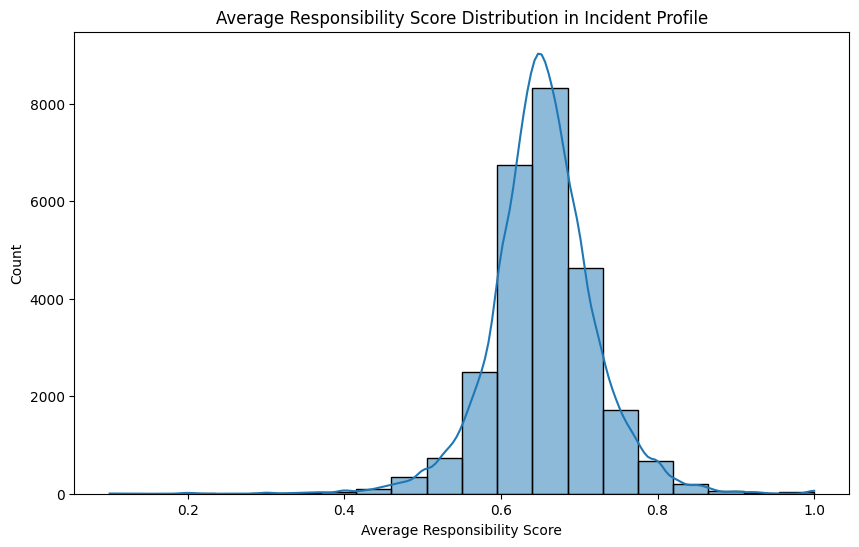

In [46]:
# distribution for avg_responsibility_score
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_responsibility_score"], bins=20, kde=True)
plt.title("Average Responsibility Score Distribution in Incident Profile")
plt.xlabel("Average Responsibility Score")
plt.ylabel("Count")
plt.show()


### avg_weather_severity

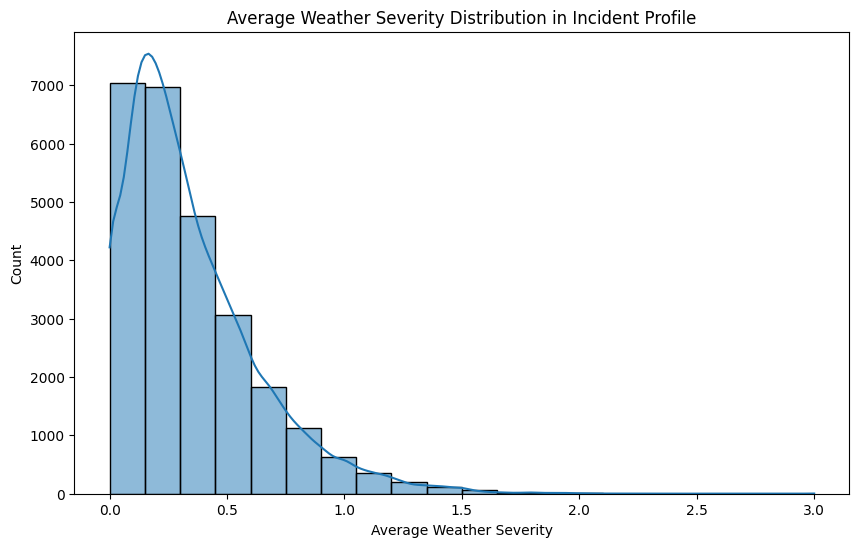

In [47]:
# distribution for avg_weather_severity
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_weather_severity"], bins=20, kde=True)
plt.title("Average Weather Severity Distribution in Incident Profile")
plt.xlabel("Average Weather Severity")
plt.ylabel("Count")
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\3525708444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_weather_severity", palette="coolwarm")


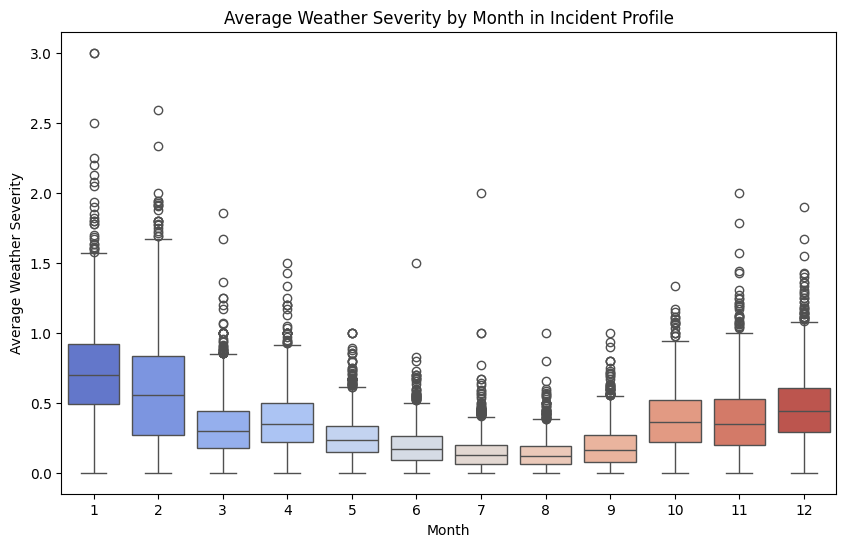

In [48]:
# weather severity w.r.t. month
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_weather_severity", palette="coolwarm")
plt.title("Average Weather Severity by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Average Weather Severity")
plt.show()


### avg_roadway_severity

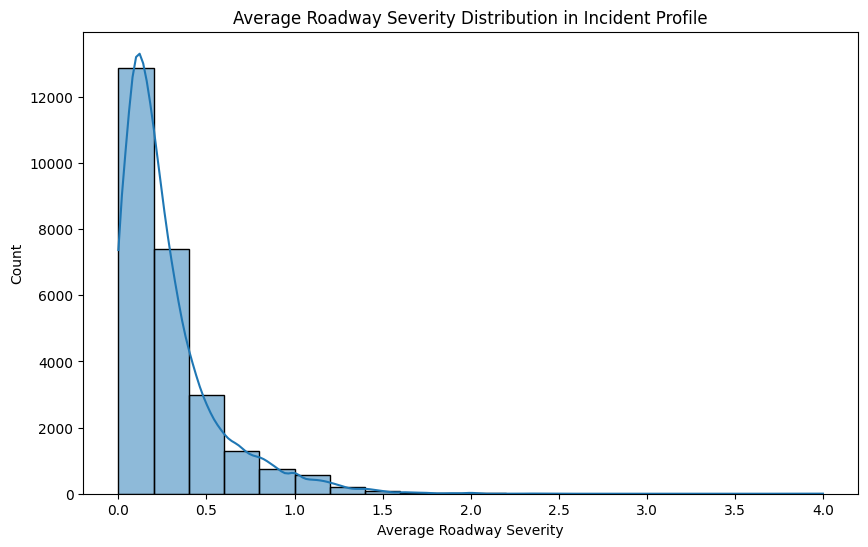

In [49]:
# distribution for avg_roadway_severity
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_roadway_severity"], bins=20, kde=True)
plt.title("Average Roadway Severity Distribution in Incident Profile")
plt.xlabel("Average Roadway Severity")
plt.ylabel("Count")
plt.show()

C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\183883270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_roadway_severity", palette="coolwarm")


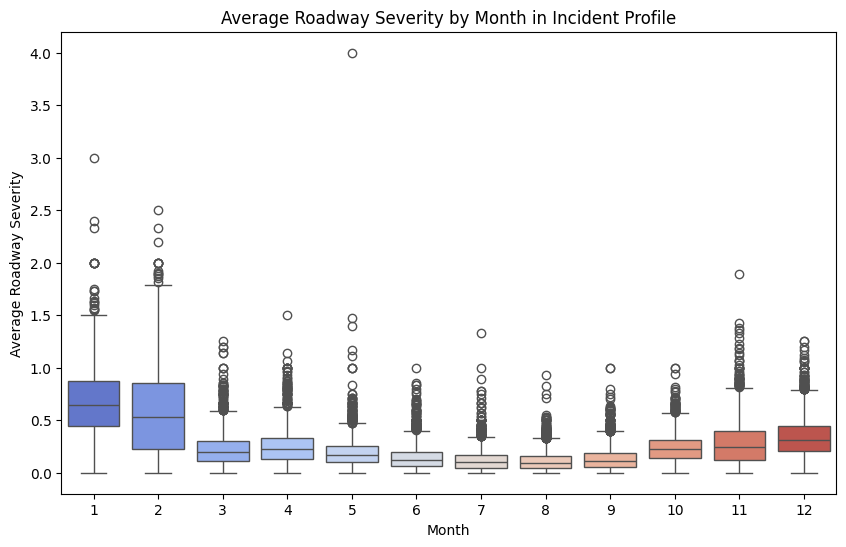

In [50]:
# roadway severity w.r.t. month
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_roadway_severity", palette="coolwarm")
plt.title("Average Roadway Severity by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Average Roadway Severity")
plt.show()


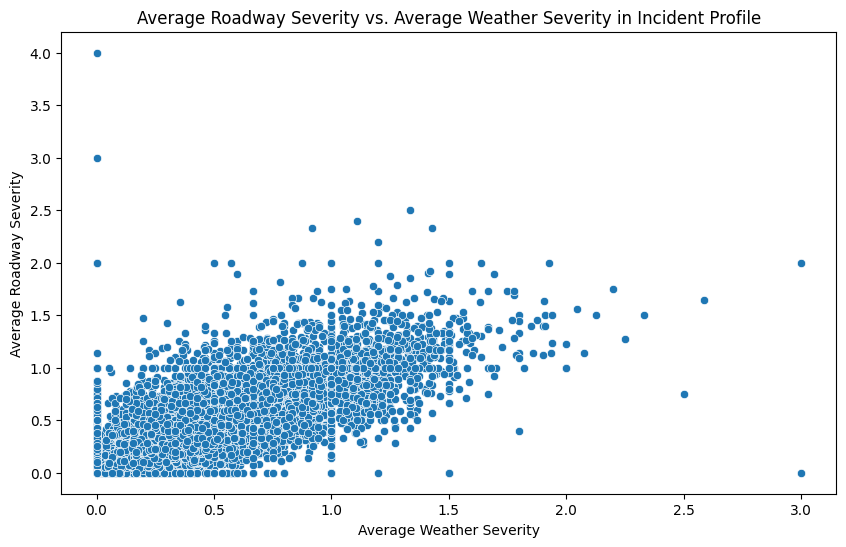

In [51]:
# distribution for avg_roading_severity w.r.t. avg_weather_severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incident_profile, x="avg_weather_severity", y="avg_roadway_severity")
plt.title("Average Roadway Severity vs. Average Weather Severity in Incident Profile")
plt.xlabel("Average Weather Severity")
plt.ylabel("Average Roadway Severity")
plt.show()


In [52]:
# correlation between avg_weather_severity and avg_roadway_severity
incident_profile[["avg_weather_severity", "avg_roadway_severity"]].corr()



,avg_weather_severity,avg_roadway_severity
avg_weather_severity,1.000000,0.779972
avg_roadway_severity,0.779972,1.000000


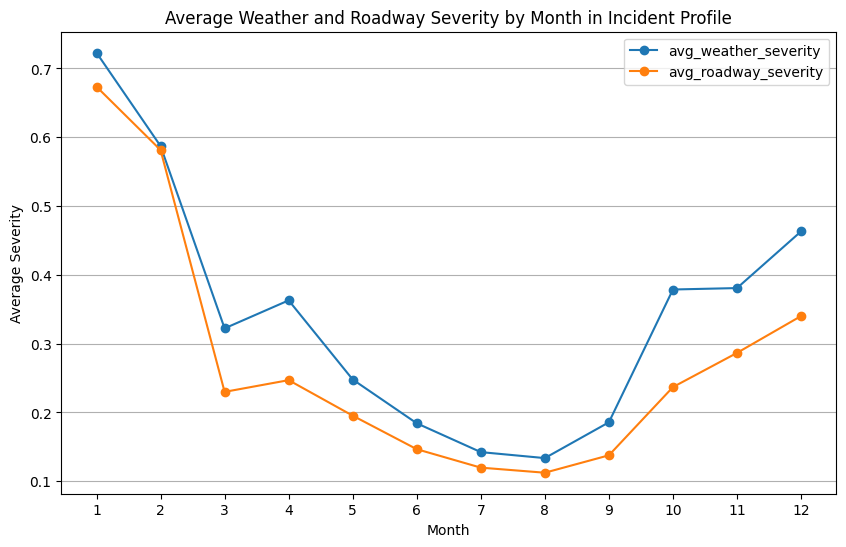

In [53]:
# take the average of these two columns for each month and plot them
weather_roadway_severity = incident_profile.groupby("CRASH_MONTH")[["avg_weather_severity", "avg_roadway_severity"]].mean()
weather_roadway_severity.plot(kind="line", figsize=(10, 6), marker="o")
plt.title("Average Weather and Roadway Severity by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Average Severity")
plt.xticks(range(1, 13))
plt.grid(axis="y")
plt.show()




### avg_lighting_severity, night_crash_rate

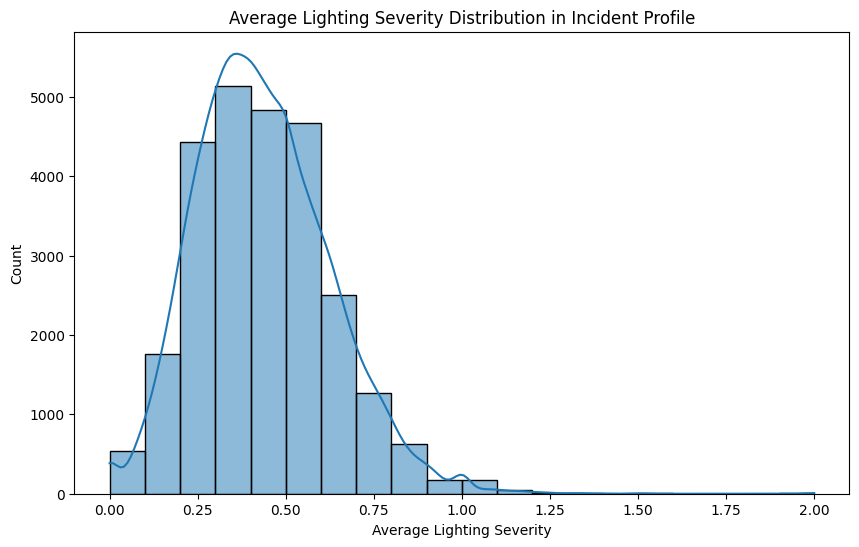

In [54]:
# distribution for avg_lighting_severity
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_lighting_severity"], bins=20, kde=True)
plt.title("Average Lighting Severity Distribution in Incident Profile")
plt.xlabel("Average Lighting Severity")
plt.ylabel("Count")
plt.show()


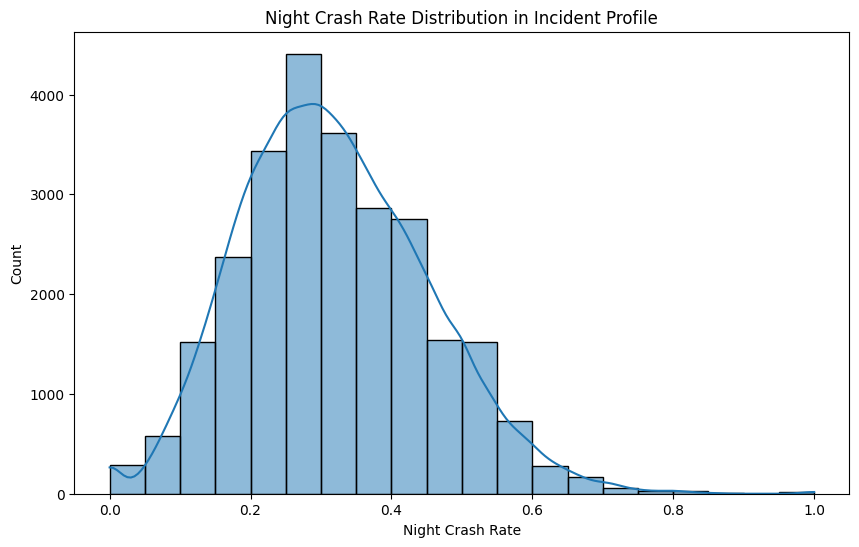

In [55]:
# night_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["night_crash_rate"], bins=20, kde=True)
plt.title("Night Crash Rate Distribution in Incident Profile")
plt.xlabel("Night Crash Rate")
plt.ylabel("Count")
plt.show()


In [56]:
# correlation between night_crash_rate and avg_lighting_severity
incident_profile[["night_crash_rate", "avg_lighting_severity"]].corr()


,night_crash_rate,avg_lighting_severity
night_crash_rate,1.000000,0.937864
avg_lighting_severity,0.937864,1.000000


---

### adverse_weather_crash_rate

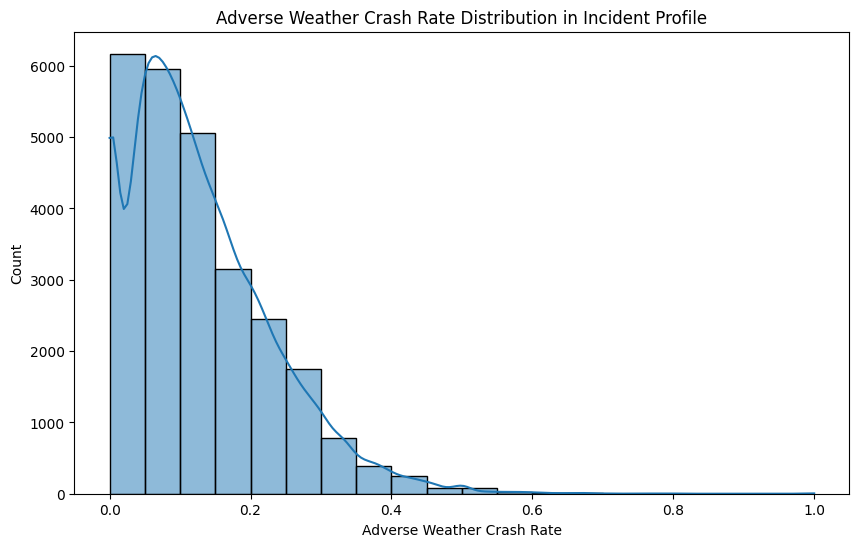

In [57]:
# adverse_weather_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["adverse_weather_crash_rate"], bins=20, kde=True)
plt.title("Adverse Weather Crash Rate Distribution in Incident Profile")
plt.xlabel("Adverse Weather Crash Rate")
plt.ylabel("Count")
plt.show()

In [58]:
# correlation between adverse_weather_crash_rate and avg_weather_severity
incident_profile[["adverse_weather_crash_rate", "avg_weather_severity"]].corr()

,adverse_weather_crash_rate,avg_weather_severity
adverse_weather_crash_rate,1.000000,0.957067
avg_weather_severity,0.957067,1.000000


C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\2089858169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile_test, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")


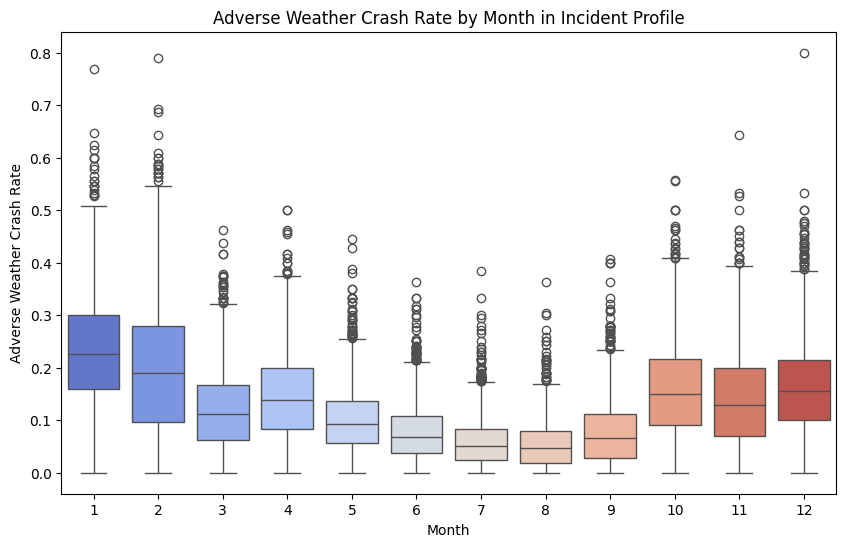

In [59]:

# adverse_weather_crash_rate per month distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile_test, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")
plt.title("Adverse Weather Crash Rate by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Adverse Weather Crash Rate")
plt.show()

C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\2398517115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")


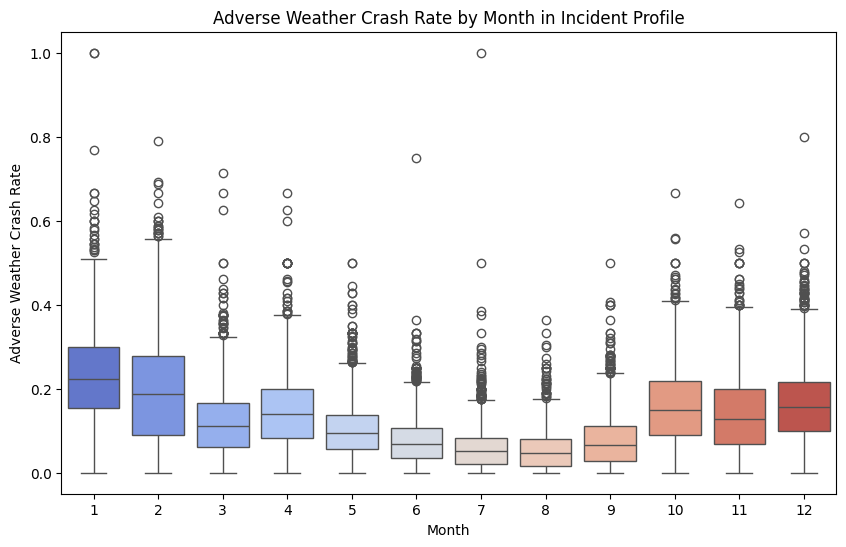

In [60]:
# adverse_weather_crash_rate per month distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")
plt.title("Adverse Weather Crash Rate by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Adverse Weather Crash Rate")
plt.show()

---

### road_defect_crash_rate

defined as crashes[["ROAD_DEFECT_CATEGORY_BAD", "ROAD_DEFECT_CATEGORY_DEFECT", "ROAD_DEFECT_CATEGORY_DEBRIS"]].sum(axis=1)

the sum of all the crashes with at least one of these categories

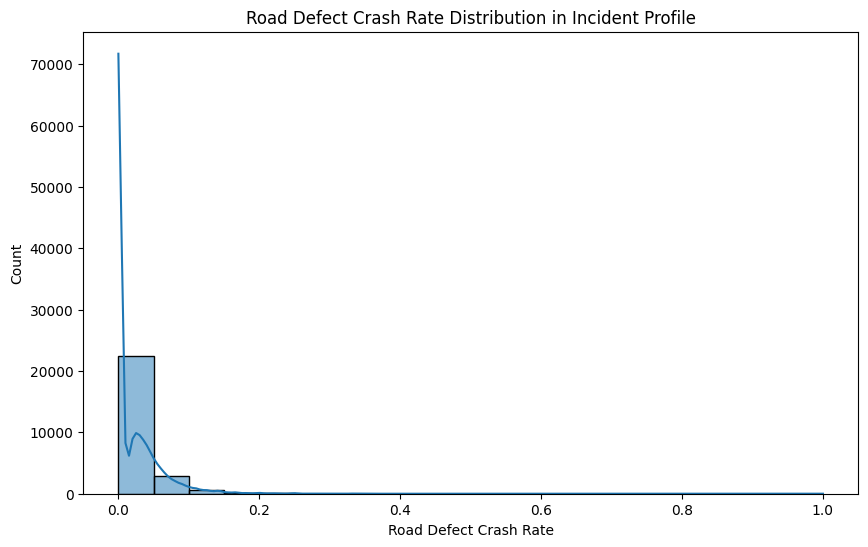

In [61]:
### road_defect_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["road_defect_crash_rate"], bins=20, kde=True)
plt.title("Road Defect Crash Rate Distribution in Incident Profile")
plt.xlabel("Road Defect Crash Rate")
plt.ylabel("Count")
plt.show()

In [62]:
# correlation between road_defect_crash_rate and avg_roadway_severity
incident_profile[["road_defect_crash_rate", "avg_roadway_severity"]].corr()

,road_defect_crash_rate,avg_roadway_severity
road_defect_crash_rate,1.000000,0.354331
avg_roadway_severity,0.354331,1.000000


---

### speeding_influence

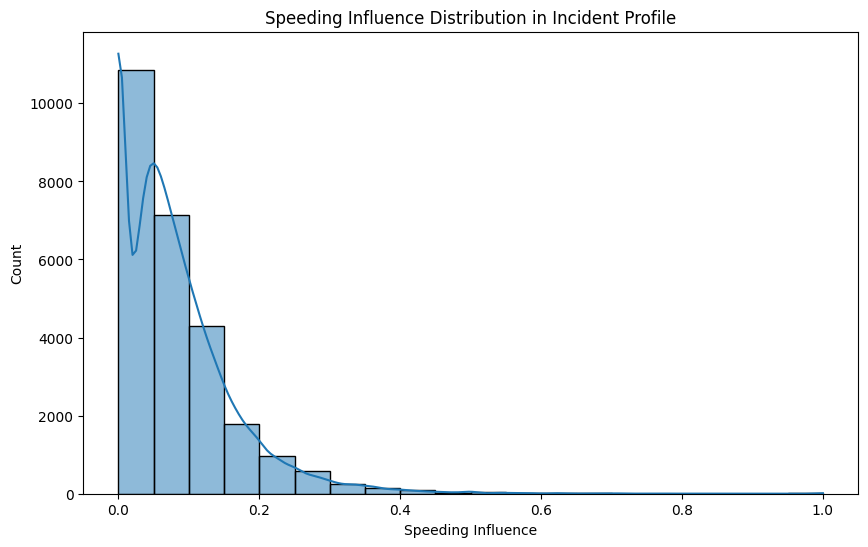

In [63]:
### speeding_influence distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["speeding_influence"], bins=20, kde=True)
plt.title("Speeding Influence Distribution in Incident Profile")
plt.xlabel("Speeding Influence")
plt.ylabel("Count")
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\375958787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="speeding_influence", palette="coolwarm")


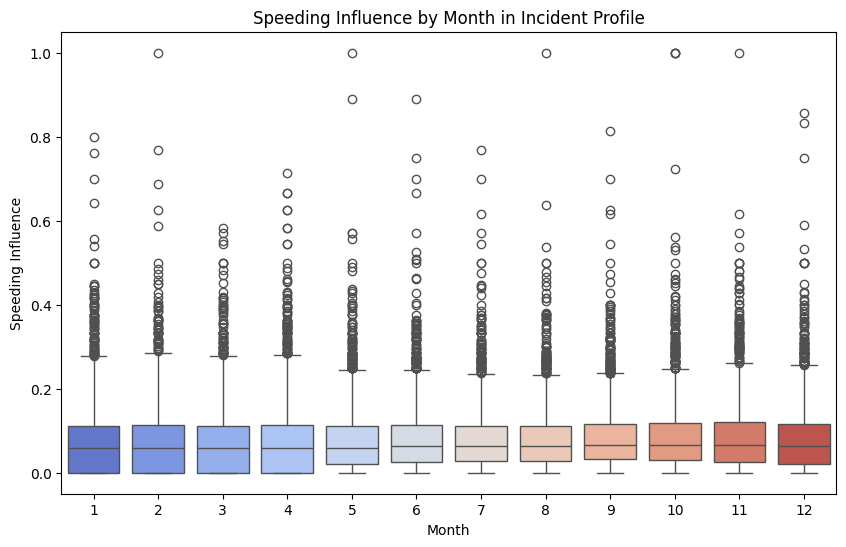

In [64]:
### speeding_influence per month distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="speeding_influence", palette="coolwarm")
plt.title("Speeding Influence by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Speeding Influence")
plt.show()


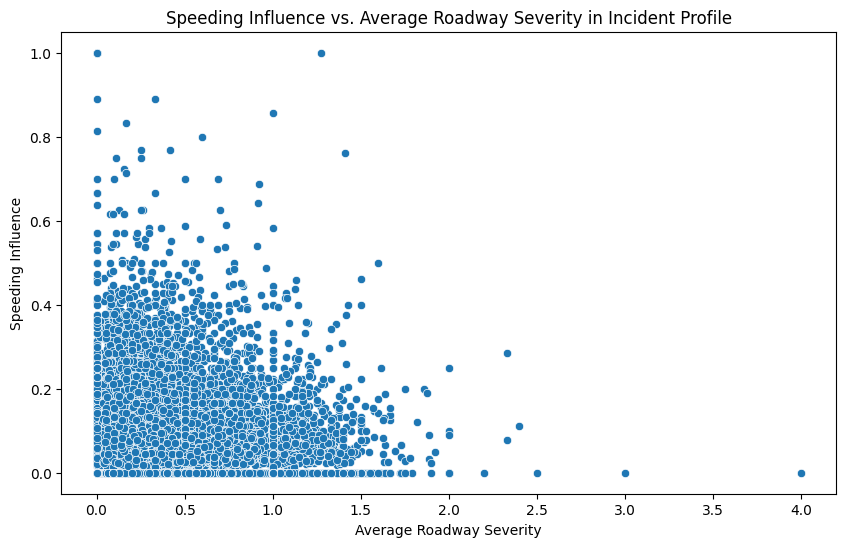

In [65]:
# speeding_influence w.r.t. avg_roadway_severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incident_profile, x="avg_roadway_severity", y="speeding_influence")
plt.title("Speeding Influence vs. Average Roadway Severity in Incident Profile")
plt.xlabel("Average Roadway Severity")
plt.ylabel("Speeding Influence")
plt.show()


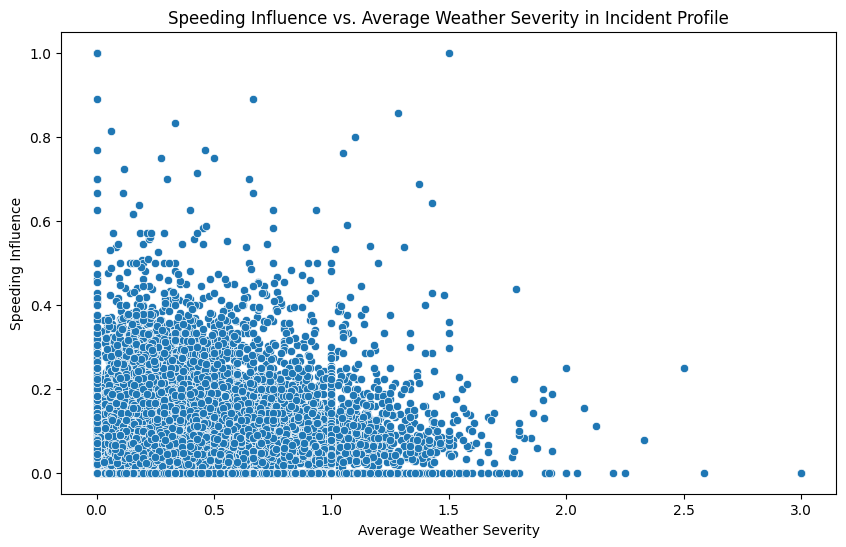

In [66]:
# speeding_influence w.r.t. avg_weather_severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incident_profile, x="avg_weather_severity", y="speeding_influence")
plt.title("Speeding Influence vs. Average Weather Severity in Incident Profile")
plt.xlabel("Average Weather Severity")
plt.ylabel("Speeding Influence")
plt.show()


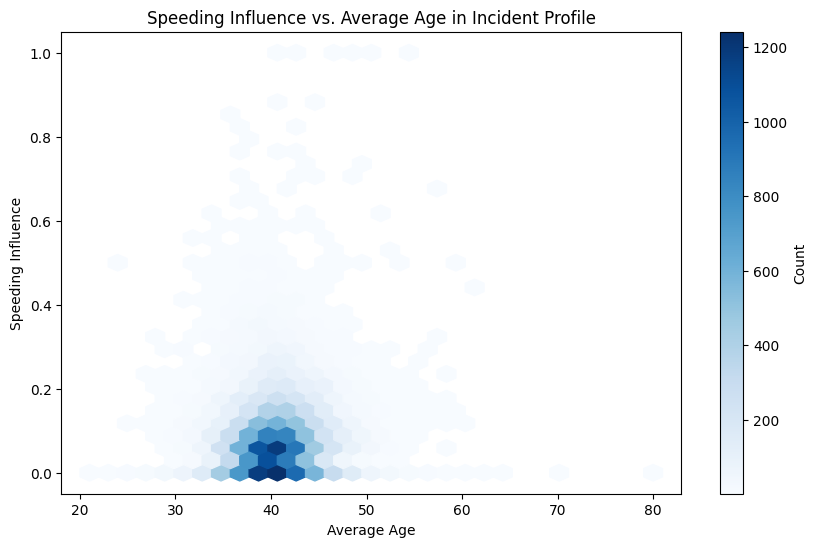

In [67]:
# speeding_influence w.r.t. age
plt.figure(figsize=(10, 6))
plt.hexbin(incident_profile["avg_age"], incident_profile["speeding_influence"], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title("Speeding Influence vs. Average Age in Incident Profile")
plt.xlabel("Average Age")
plt.ylabel("Speeding Influence")
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\3724319751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_speed = crashes.groupby('AGE_BIN')['speeding_influence'].mean()


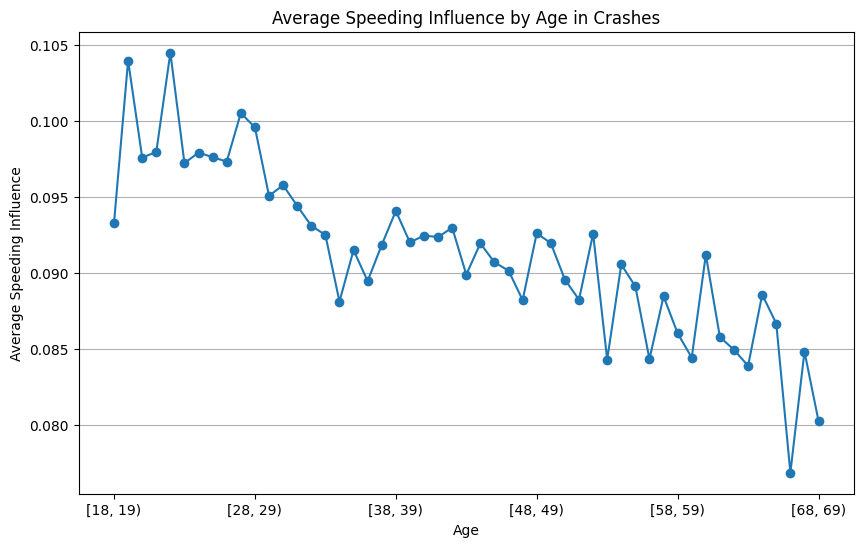

In [68]:
# crashes age distribution w.r.t. speeding influence
crashes['AGE_BIN'] = pd.cut(crashes['AGE'], bins=range(18, 70, 1), right=False)
age_speed = crashes.groupby('AGE_BIN')['speeding_influence'].mean()
plt.figure(figsize=(10, 6))
age_speed.plot(kind='line', marker='o')
plt.title('Average Speeding Influence by Age in Crashes')
plt.xlabel('Age')
plt.ylabel('Average Speeding Influence')
plt.grid(axis='y')
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\3230488105.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_speed_limit = crashes.groupby('AGE_BIN')['POSTED_SPEED_LIMIT'].mean()


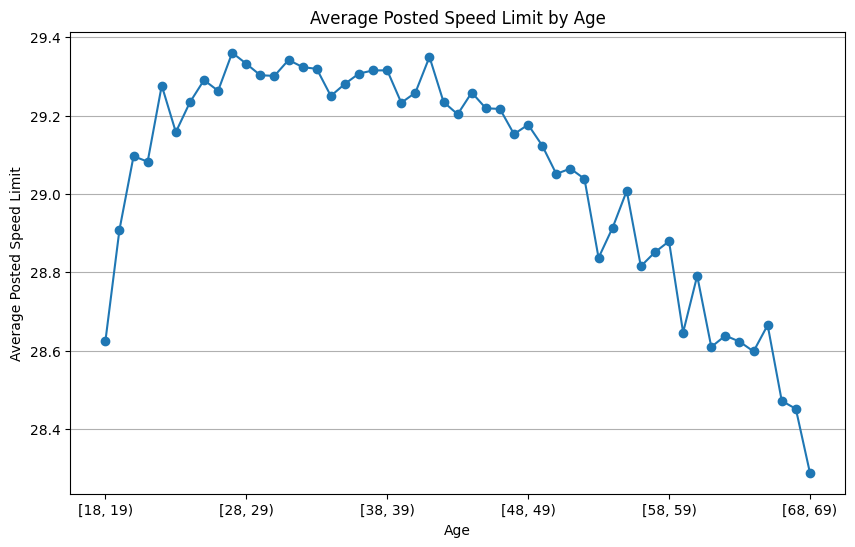

In [69]:
# Create age bins
crashes['AGE_BIN'] = pd.cut(crashes['AGE'], bins=range(18, 70, 1), right=False)

# Calculate the average POSTED_SPEED_LIMIT for each age bin
age_speed_limit = crashes.groupby('AGE_BIN')['POSTED_SPEED_LIMIT'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
age_speed_limit.plot(kind='line', marker='o')
plt.title('Average Posted Speed Limit by Age')
plt.xlabel('Age')
plt.ylabel('Average Posted Speed Limit')
plt.grid(axis='y')
plt.show()

---

### weekend_crash_rate

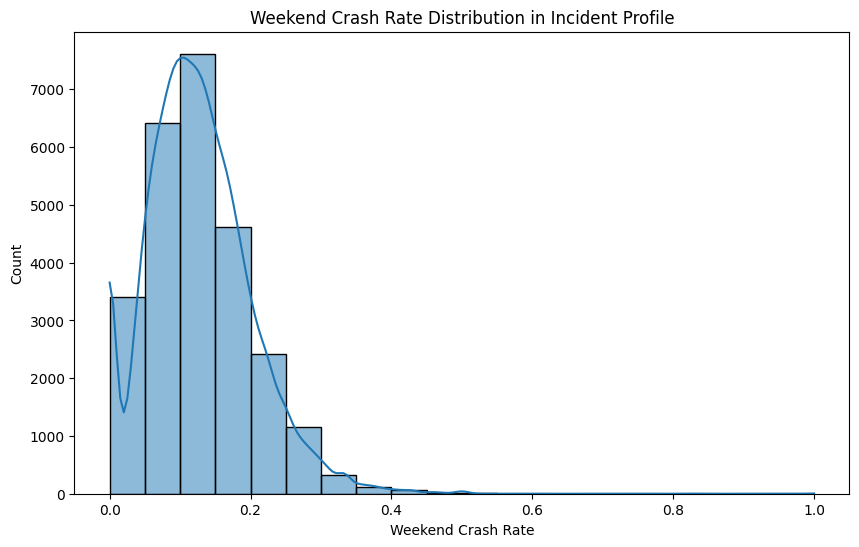

In [70]:
# weekend_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["weekend_crash_rate"], bins=20, kde=True)
plt.title("Weekend Crash Rate Distribution in Incident Profile")
plt.xlabel("Weekend Crash Rate")
plt.ylabel("Count")
plt.show()

---

In [72]:
incident_profile_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25078 entries, 0 to 26184
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            25078 non-null  int64  
 1   CRASH_MONTH                           25078 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    25078 non-null  float64
 3   avg_age                               25078 non-null  float64
 4   avg_responsibility_score              25075 non-null  float64
 5   avg_weather_severity                  25078 non-null  float64
 6   avg_roadway_severity                  25078 non-null  float64
 7   avg_lighting_severity                 25078 non-null  float64
 8   total_crashes                         25078 non-null  int64  
 9   fatality_rate                         25078 non-null  float64
 10  severe_injury_rate                    25078 non-null  float64
 11  avg_crash_severity_s

In [74]:
# for avg_responsibility_score, check which BEAT_OF_OCCURRENCE have missing values

incident_profile_test[incident_profile_test['avg_responsibility_score'].isnull()]['BEAT_OF_OCCURRENCE'].value_counts()



BEAT_OF_OCCURRENCE
2024.0    1
314.0     1
724.0     1
Name: count, dtype: int64

In [75]:
# for those BEAT_OF_OCCURRENCE with missing values, fill them with the mean of the same BEAT_OF_OCCURRENCE, same MONTH but different YEAR
incident_profile_test['avg_responsibility_score'] = incident_profile_test.groupby(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH'])['avg_responsibility_score'].transform(lambda x: x.fillna(x.mean()))

incident_profile_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25078 entries, 0 to 26184
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            25078 non-null  int64  
 1   CRASH_MONTH                           25078 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    25078 non-null  float64
 3   avg_age                               25078 non-null  float64
 4   avg_responsibility_score              25078 non-null  float64
 5   avg_weather_severity                  25078 non-null  float64
 6   avg_roadway_severity                  25078 non-null  float64
 7   avg_lighting_severity                 25078 non-null  float64
 8   total_crashes                         25078 non-null  int64  
 9   fatality_rate                         25078 non-null  float64
 10  severe_injury_rate                    25078 non-null  float64
 11  avg_crash_severity_s

C:\Users\chucki\AppData\Local\Temp\ipykernel_5284\1289273659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_profile_test['avg_responsibility_score'] = incident_profile_test.groupby(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH'])['avg_responsibility_score'].transform(lambda x: x.fillna(x.mean()))


In [76]:
incident_profile_test.to_csv('dataset/incident_profile_95.csv', index=False)